# Анализ и визуализация целей обучения студентов “Яндекс Практикум”

**Цель исследования**

* определить нормальные и найти аномальные показатели
* определить коррелирующие параметры, построить портреты студентов, сравнить их, чтобы выделить значимые закономерности
* сегментировать студентов (по 2-м и более показателям), выявить
особенности сегментов
* сформулировать на основе данных гипотезы по улучшению
выстраивания помощи студентам в достижении их целей,
* оформить выводы и гипотезы аналитиков с помощью инструментов
фигмы для презентации руководству Яндекс Практикума.

**Описание данных**

*hackathon_metrics.csv*

`profession_name` — код профессии  
`user_id` — уникальный id пользователя  
`lp_avg_user` — средний learning performance Первые, более высокие значения в таблице с фри-трека, последние с курса, наиболее актуально находящиеся в таблице ниже  
`question_title` — текст вопроса  
`user_answer` — ответ пользователя на вопрос  
`statement_content` — формулировка вопроса об уверенности в знаниях  
`value` — ответ на вопрос об уверенности в знаниях для расчёта learning experience индекса

*data_goals_answers.xlsx*

` question_title` — текст вопроса  
`question_type` — тип вопроса  
`user_id` — уникальный id пользователя  
`user_answer` — ответ пользователя на вопрос  
`answer_date` — время ответа  
`answer_id` — id ответа  
`cohort, current_cohort` — начальная и текущая когорта студента  
`course_name, topic_name, lesson_name` — курс, тема и урок, на котором студент отвечает на вопрос
   У нас значения должны быть Трудоустройство-Трудоустройство-Цель обучения, т.к. мы изучаем именно это  
`original_segment, current_segment — b2c/b2b/b2g — из какого сегмента был/стал студент — сам является клиентом, его обучение оплачивается бизнесом или государством  
`profession_name` — код профессии  
`statement_content` — формулировка вопроса об уверенности в знаниях (в этой таблице нет)

`slide_position` — страница опроса (не нужно для анализа)

Ход исследования
О качестве данных ничего не известно. Поэтому предварительно необходимо произвести обзор данных.

**Ход исследования**  
О качестве данных ничего не известно. Поэтому предварительно необходимо произвести обзор данных. 

Таким образом, работа по проекту пройдет по этапам:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ.
 4. Выводы.

## Обзор данных

In [ ]:
pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#импорт библитоек
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Зададим параметры отображения графиков
plt.rc('axes', titlesize = 15, grid = True)
plt.rc('grid', alpha = 0.2)
plt.rc('figure', figsize = (11, 5))
cmap = sns.color_palette("coolwarm", as_cmap=True)

warnings.filterwarnings("ignore")
#plt.style.use('dark_background')
pd.set_option('display.max_columns', None) 

In [ ]:
!gdown 1Va76RDoz5DwLio4bT_DkbK_sB2PNMjrP
!unzip -o '/content/hackathon_fin.zip' -d '/content/hackathon/'
try:
  data_goals_answers = pd.read_excel('/content/hackathon/data_goals_answers_fin.xlsx', index_col = 0) 
  hackathon_metrics = pd.read_csv('/content/hackathon/hackathon_metrics.csv')
  display('Файлы загружены онлайн') 
except: 
  display('FileNotFoundError')

Downloading...
From: https://drive.google.com/uc?id=1Va76RDoz5DwLio4bT_DkbK_sB2PNMjrP
To: /content/hackathon_fin.zip
100% 5.39M/5.39M [00:00<00:00, 217MB/s]
Archive:  /content/hackathon_fin.zip
  inflating: /content/hackathon/data_goals_answers_fin.xlsx  
  inflating: /content/hackathon/hackathon_metrics.csv  


'Файлы загружены онлайн'

In [ ]:
data_goals_answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43428 entries, 1 to 43428
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            43428 non-null  int64  
 1   answer_date        43428 non-null  object 
 2   answer_id          43428 non-null  object 
 3   cohort             43428 non-null  object 
 4   course_name        43428 non-null  object 
 5   current_cohort     43428 non-null  object 
 6   current_segment    43223 non-null  object 
 7   lesson_name        43428 non-null  object 
 8   original_segment   43223 non-null  object 
 9   profession_name    43428 non-null  object 
 10  question_title     43428 non-null  object 
 11  question_type      43428 non-null  object 
 12  slide_position     43428 non-null  int64  
 13  statement_content  0 non-null      float64
 14  topic_name         43428 non-null  object 
 15  user_answer        43416 non-null  object 
dtypes: float64(1), int64(2

**Вывод** 

Всего **43428 записи**  
В таблице **16 колонок**  
Типы данных во всех столбцах — **object, int64, float64**  

В названиях колонок не обнаружены нарушения стиля.  
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Видно, что некоторые колонки имеют неправильный формат данных. 

In [ ]:
hackathon_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79117 entries, 0 to 79116
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         79117 non-null  int64  
 1   profession_name    79117 non-null  object 
 2   user_id            79117 non-null  int64  
 3   lp_avg_user        79117 non-null  float64
 4   statement_content  79117 non-null  object 
 5   value              79117 non-null  int64  
 6   question_title     14739 non-null  object 
 7   user_answer        14739 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 4.8+ MB


**Вывод** 

Всего **79117 записи**  
В таблице **7 колонок**  
Типы данных во всех столбцах — **object, int64, float64**  

В названиях колонок не обнаружены нарушения стиля.  
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Данные  в колонках имеют правильный формат. 

## Предобработка данных

### Предобработка в data_goals_answers

In [ ]:
data_goals_answers.describe(include='all')

,user_id,answer_date,answer_id,cohort,course_name,current_cohort,current_segment,lesson_name,original_segment,profession_name,question_title,question_type,slide_position,statement_content,topic_name,user_answer
count,4.342800e+04,43428,43428,43428,43428,43428,43223,43428,43223,43428,43428,43428,43428.000000,0.0,43428,43416
unique,NaN,7882,14094,169,1,173,3,1,3,11,6,3,NaN,NaN,1,1102
top,NaN,2023-09-11 10:38:00,076646fa-5e3f-4bb1-a90f-bea31c80a282,data_cohort_119,Трудоустройство,data_cohort_119,b2c,Цель обучения,b2g,data-analyst,Для программы важно понять над чем вам нужно п...,checkbox,NaN,NaN,Трудоустройство,Нет
freq,NaN,58,13,3411,43428,3757,21568,43428,22415,18651,25822,25822,NaN,NaN,43428,2745
mean,9.978202e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.161716,NaN,NaN,NaN
std,5.839796e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.368194,NaN,NaN,NaN
min,3.157000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,3.168334e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
50%,1.373815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
75%,1.480577e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN


In [ ]:
# функция поиска пропусков
def pass_value_barh(df):
    try:
        ( 
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (8,4), rot = -5, legend = False, fontsize = 10, color = '#1f928d')
            .set_title('% of NaN (из {} строк)'.format(len(df)) + "\n", fontsize = 15, color = 'white')        
        )
    except:
        print('пропусков не осталось :) ')

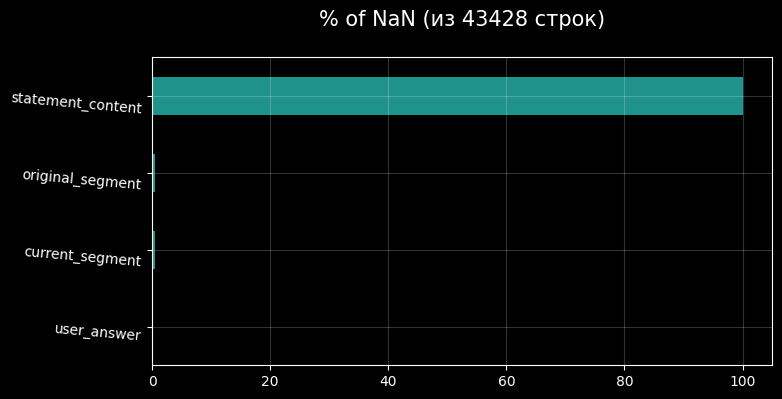

In [ ]:
#визуализируем пропуски в data_goals_answers
pass_value_barh(data_goals_answers)

In [ ]:
# проверяем пропуски 
numbers_of_nulls = pd.DataFrame(columns=['names'], data=data_goals_answers.columns)
numbers_of_nulls['nulls'] = data_goals_answers.isnull().sum().values
numbers_of_nulls['nulls_percent'] = (numbers_of_nulls['nulls']/data_goals_answers.shape[0] * 100).round(2)
numbers_of_nulls[numbers_of_nulls['nulls'] > 0]

,names,nulls,nulls_percent
6,current_segment,205,0.47
8,original_segment,205,0.47
13,statement_content,43428,100.00
15,user_answer,12,0.03


In [ ]:
# удаляем пустой столбец statement_content, не нужный по условию slide_position
data_goals_answers.drop(['statement_content', 'slide_position'], axis=1, inplace=True)

In [ ]:
# проверяем дубликаты
data_goals_answers.duplicated().sum()

0

In [ ]:
# приводим формат даных в колонке answer_date к datetime64
data_goals_answers['answer_date'] = pd.to_datetime(data_goals_answers['answer_date']).dt.date.astype('datetime64')

In [ ]:
# превратим столбцы с номерами когорты в цифры
data_goals_answers['cohort'] = ['.'.join(re.findall('\d+', x)) for x in data_goals_answers['cohort']]
data_goals_answers['current_cohort'] = ['.'.join(re.findall('\d+', x)) for x in data_goals_answers['current_cohort']]
data_goals_answers['cohort'] = data_goals_answers['cohort'].astype(float).astype(int)
data_goals_answers['current_cohort'] = data_goals_answers['current_cohort'].astype(float).astype(int)

### Предобработка в hackathon_metrics

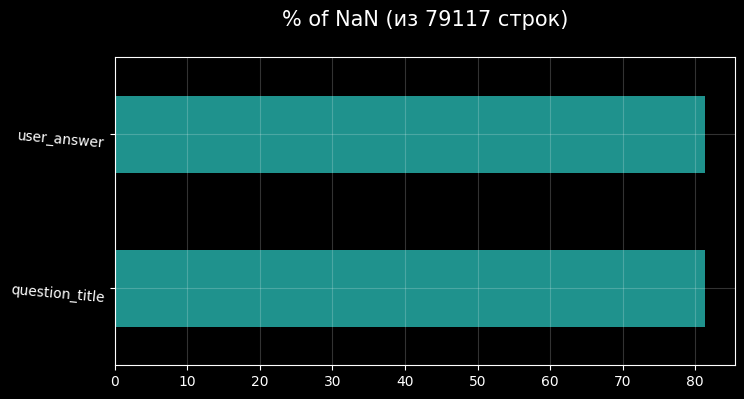

In [ ]:
#Посмотрим пропуски
pass_value_barh(hackathon_metrics)

Много пропусков в даных о рекомендацих Яндекс Практикума. Так как вопососов много, а поле необязательное, студенты игнорируют ответы на этот вопрос

In [ ]:
#определим основные характеристики данных
hackathon_metrics.describe(include='all')

,Unnamed: 0,profession_name,user_id,lp_avg_user,statement_content,value,question_title,user_answer
count,79117.000000,79117,7.911700e+04,79117.000000,79117,79117.000000,14739,14739.000000
unique,NaN,10,NaN,NaN,1,NaN,1,NaN
top,NaN,data-analyst,NaN,NaN,Моя уверенность в своих знаниях значительно по...,NaN,"Какова вероятность, что вы порекомендуете Прак...",NaN
freq,NaN,32077,NaN,NaN,79117,NaN,14739,NaN
mean,39558.000000,NaN,1.018495e+07,0.719819,NaN,0.920839,NaN,8.066829
std,22839.254961,NaN,5.894170e+06,0.125474,NaN,1.073381,NaN,2.246711
min,0.000000,NaN,3.770000e+02,0.140000,NaN,-2.000000,NaN,0.000000
25%,19779.000000,NaN,3.354706e+06,0.633636,NaN,0.000000,NaN,7.000000
50%,39558.000000,NaN,1.395732e+07,0.725000,NaN,1.000000,NaN,9.000000
75%,59337.000000,NaN,1.497364e+07,0.811429,NaN,2.000000,NaN,10.000000


In [ ]:
#вопросы по знаниям полученным на спринте
hackathon_metrics.statement_content.value_counts(dropna=False)

Моя уверенность в своих знаниях значительно повысилась по сравнению с предыдущим спринтом    79117
Name: statement_content, dtype: int64

In [ ]:
#варианты ответов студентов
hackathon_metrics.value.value_counts(dropna=False)

 1    28424
 2    28088
 0    13718
-1     6028
-2     2859
Name: value, dtype: int64

In [ ]:
#вопорсы про вероятность рекомндаций
hackathon_metrics.question_title.value_counts(dropna=False)

NaN                                                                                                                                                         64378
Какова вероятность, что вы порекомендуете Практикум своим друзьям по шкале от 0 до 10, где 10 — обязательно порекомендую, 0 — не порекомендую ни за что?    14739
Name: question_title, dtype: int64

In [ ]:
#ответы по вероятность рекомендаций 
hackathon_metrics.user_answer.value_counts(dropna=False)

NaN     64378
10.0     5502
8.0      2828
9.0      1993
7.0      1725
5.0       960
6.0       705
3.0       308
0.0       234
4.0       220
2.0       143
1.0       121
Name: user_answer, dtype: int64

In [ ]:
# проверяем дубликаты
hackathon_metrics.duplicated().sum()

0

In [ ]:
hackathon_metrics.drop_duplicates(inplace=True)

## Исследовательский анализ данных

### Обзор общей информации по всем студентам

In [ ]:
#определим сколько всего физических лиц учится на курсах
print('всего физических лиц:', len(hackathon_metrics.user_id.unique()))

всего физических лиц: 9797


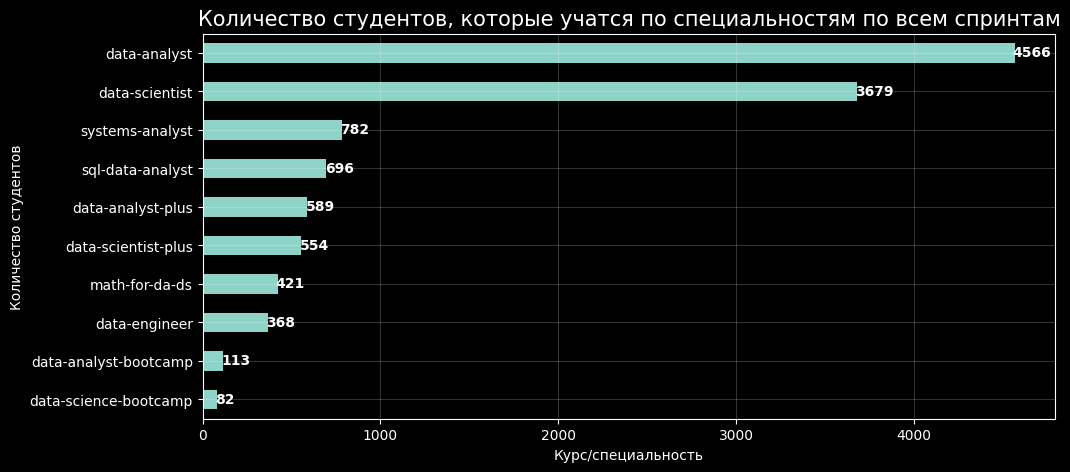

In [ ]:
#определим сколько студентов учатся по курсам
count_proffession = hackathon_metrics.groupby('profession_name')['user_id'].nunique().sort_values()

fig, ax = plt.subplots()
count_proffession.plot.barh()
count = count_proffession.tolist()
for i, v in enumerate(count):
    ax.text(v-10, i-0.1 , str(v), color='white', fontweight='bold')
plt.title('Количество студентов, которые учатся по специальностям по всем спринтам')
plt.ylabel('Количество студентов')
plt.xlabel('Курс/специальность')
plt.show()

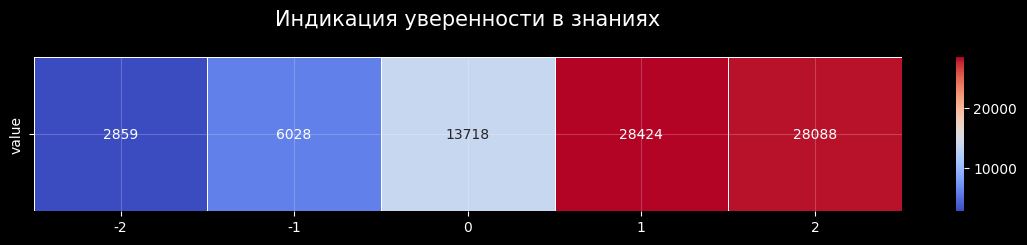

In [ ]:
statement_answer = hackathon_metrics.value.value_counts(dropna=False).to_frame().sort_index().T
fig, ax = plt.subplots(figsize=(14, 2)) 
sns.heatmap(statement_answer, annot=True, linewidths=.5, fmt='d', cmap=cmap) 
plt.title('Индикация уверенности в знаниях'+'\n')
plt.show()

In [ ]:
#сколько спринтов прошел каждый студент по всем специальностям, которые он изучал
data_sprint = hackathon_metrics.groupby('user_id')['profession_name'].size().reset_index(name="count")
data_sprint['count'].describe()

count    9797.000000
mean        8.075635
std         5.475426
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        64.000000
Name: count, dtype: float64

В среднем, каждый студент прошел 8 спринтов. Есть те, кто только начал обучение и те, кто уже на 12 спринте. Однако, в данных могут быть те, кто обучался по нескольким специальностям. Определим их

In [ ]:
#студенты, которые получают более одной профессии
hackathon_metrics.groupby('user_id')['profession_name'].nunique().reset_index(name="count").query("count > 1").describe()

,user_id,count
count,1.740000e+03,1740.000000
mean,9.367362e+06,2.179885
std,6.091104e+06,0.460452
min,1.774000e+03,2.000000
25%,2.482434e+06,2.000000
50%,1.291659e+07,2.000000
75%,1.475022e+07,2.000000
max,1.606595e+07,6.000000


Хороший показатель. 1740 проходят более одного курса. Даже есть такие кто проходит 6. Посмотрим как показатели студентов меняются в разбивке по спринтам.

In [ ]:
#Добавляем номер спринта в hackathon_metrics
hackathon_metrics['sprint'] = hackathon_metrics.groupby(['user_id','profession_name'])['Unnamed: 0'].transform('rank')
hackathon_metrics.head()

,Unnamed: 0,profession_name,user_id,lp_avg_user,statement_content,value,question_title,user_answer,sprint
0,0,sql-data-analyst,14641026,0.860000,Моя уверенность в своих знаниях значительно по...,2,"Какова вероятность, что вы порекомендуете Прак...",9.0,1.0
1,1,sql-data-analyst,14641026,0.930000,Моя уверенность в своих знаниях значительно по...,2,"Какова вероятность, что вы порекомендуете Прак...",9.0,2.0
2,2,data-analyst,14881168,0.480000,Моя уверенность в своих знаниях значительно по...,1,NaN,NaN,1.0
3,3,data-analyst,14881168,0.426667,Моя уверенность в своих знаниях значительно по...,1,NaN,NaN,2.0
4,4,data-scientist,7855703,0.611111,Моя уверенность в своих знаниях значительно по...,2,NaN,NaN,1.0


In [ ]:
#Посмотрим LP по спринтам
sprint_lp = hackathon_metrics.pivot_table(index='profession_name', 
                             columns = ['sprint'], 
                             values = 'lp_avg_user', 
                             aggfunc = 'median')
sprint_lp

sprint,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0
profession_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
data-analyst,0.700000,0.700000,0.700000,0.699286,0.700000,0.697735,0.700000,0.700000,0.700000,0.697500,0.702500,0.702143,0.718750,0.718750,0.720000,0.720000,0.723500,0.723500,0.705000,0.705000,0.697500,0.704167,0.720000,0.720000,0.590500,0.590500,0.590500,0.450000,0.450000,0.450000,0.45,0.45,NaN,NaN,NaN,NaN
data-analyst-bootcamp,0.775000,0.780000,0.760000,0.760000,0.767500,0.780000,0.790000,0.805000,0.820000,0.820000,0.790000,0.790000,0.785000,0.785000,0.765000,0.765000,0.752500,0.752500,0.752500,0.752500,0.365000,0.365000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-analyst-plus,0.740000,0.740000,0.735833,0.745000,0.750000,0.751714,0.750000,0.750000,0.773333,0.773333,0.721667,0.721667,0.560000,0.560000,0.560000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-engineer,0.840000,0.850000,0.850000,0.850714,0.846190,0.853500,0.861429,0.863333,0.866667,0.866905,0.867143,0.867143,0.864762,0.864762,0.861429,0.857000,0.838929,0.838929,0.842857,0.842857,0.842857,0.842857,0.842857,0.842857,0.844286,0.844286,0.844286,0.844286,0.844286,0.844286,0.81,0.81,0.81,0.81,0.81,0.81
data-science-bootcamp,0.785000,0.780000,0.775000,0.770000,0.755000,0.750000,0.765000,0.750000,0.785000,0.785000,0.640000,0.550000,0.550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-scientist,0.704000,0.706077,0.703452,0.704000,0.704083,0.700000,0.700000,0.701111,0.708182,0.710000,0.710000,0.710000,0.720000,0.720000,0.748333,0.728000,0.743750,0.743750,0.739500,0.739500,0.760000,0.719000,0.719000,0.719000,0.789500,0.789500,0.789500,0.789500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-scientist-plus,0.744722,0.749000,0.760000,0.760000,0.775778,0.770000,0.762917,0.765000,0.740000,0.726607,0.700909,0.700909,0.783333,0.783333,0.783333,0.860000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math-for-da-ds,0.666000,0.645000,0.630000,0.620000,0.630000,0.680000,0.690000,0.700000,0.717500,0.740000,0.743333,0.743333,0.740000,0.740000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sql-data-analyst,0.890000,0.890000,0.930000,0.900000,0.930000,0.920000,0.895000,0.890000,0.890000,0.910000,0.930000,0.930000,0.873333,0.816667,0.816667,0.816667,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.77,0.77,NaN,NaN,NaN,NaN


Уменьшение количества пользователей по профессиям вызвано вероятно наплывом новых студентов через ЦП. 
Еще не вся масса прошла спринт. 
Это не показывает сколько пользователей покинуло обучение. Посчитать отскоки студентов не получится, 
но мы можем определить сложные спринты и динамику LP и value.
Каждая запись — это форма сбора показателей оценки LP. Для некоторых студентов данные записи до 36 раз. Это скорее всего связано с студентами, которые брали академический отпуск или проходили курс повторно, или проходили дополнительные формы сбора LP.
Оставим только 9 спринтов для того, чтобы посмотреть сложные спринты.

In [ ]:
#LP по спринтам
sprint_lp = hackathon_metrics[hackathon_metrics['sprint']<10].pivot_table(index='profession_name', 
                             columns = ['sprint'], 
                             values = 'lp_avg_user', 
                             aggfunc = 'median')
sprint_lp

sprint,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
profession_name,,,,,,,,,
data-analyst,0.700000,0.700000,0.700000,0.699286,0.700000,0.697735,0.700000,0.700000,0.700000
data-analyst-bootcamp,0.775000,0.780000,0.760000,0.760000,0.767500,0.780000,0.790000,0.805000,0.820000
data-analyst-plus,0.740000,0.740000,0.735833,0.745000,0.750000,0.751714,0.750000,0.750000,0.773333
data-engineer,0.840000,0.850000,0.850000,0.850714,0.846190,0.853500,0.861429,0.863333,0.866667
data-science-bootcamp,0.785000,0.780000,0.775000,0.770000,0.755000,0.750000,0.765000,0.750000,0.785000
data-scientist,0.704000,0.706077,0.703452,0.704000,0.704083,0.700000,0.700000,0.701111,0.708182
data-scientist-plus,0.744722,0.749000,0.760000,0.760000,0.775778,0.770000,0.762917,0.765000,0.740000
math-for-da-ds,0.666000,0.645000,0.630000,0.620000,0.630000,0.680000,0.690000,0.700000,0.717500
sql-data-analyst,0.890000,0.890000,0.930000,0.900000,0.930000,0.920000,0.895000,0.890000,0.890000


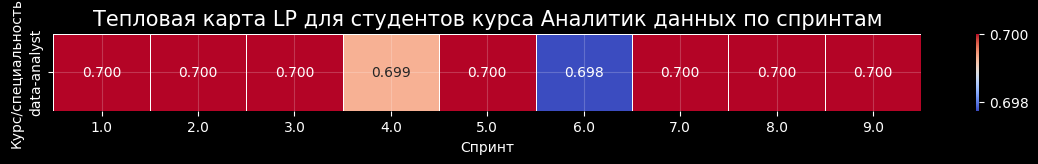

In [ ]:
#LP курса data-analyst по спринтам

fig, ax = plt.subplots(figsize=(14, 1) )
sns.heatmap(sprint_lp.loc['data-analyst'].to_frame().T, annot=True, linewidths=.5, fmt='.3f', cmap=cmap)
plt.title('Тепловая карта LP для студентов курса Аналитик данных по спринтам')
plt.xlabel('Спринт')
plt.ylabel('Курс/специальность')
plt.show()

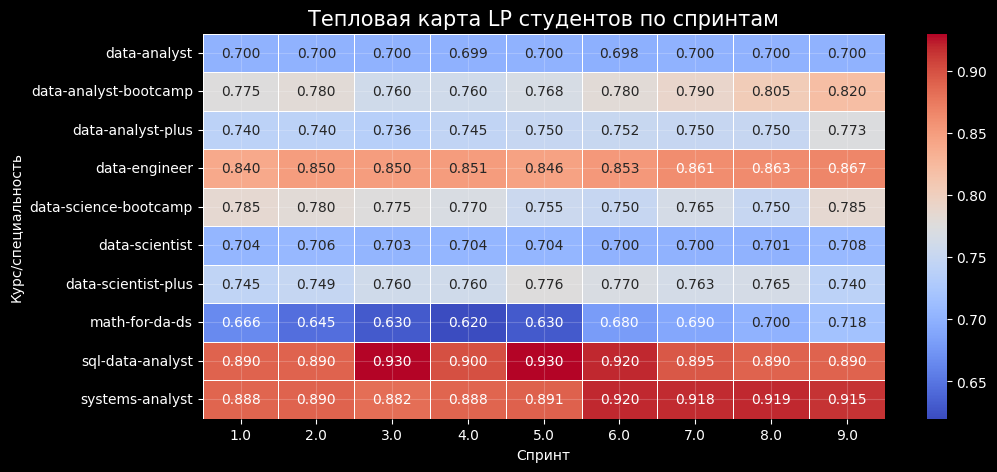

In [ ]:
#LP по всем курсам 
sns.heatmap(sprint_lp, annot=True, linewidths=.5, fmt='.3f', cmap=cmap)
plt.title('Тепловая карта LP студентов по спринтам')
plt.xlabel('Спринт')
plt.ylabel('Курс/специальность')
plt.show()

Курсы, требующие более технических знаний, показывают лучшие LP. LP показывает тенденцию к росту, по мере прохождения курса.

In [ ]:
#Value по спринтам
sprint_values = hackathon_metrics[hackathon_metrics['sprint']<10].pivot_table(index='profession_name', 
                                 columns = ['sprint'], 
                                 values = 'value', 
                                 aggfunc = 'median')
sprint_values

sprint,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
profession_name,,,,,,,,,
data-analyst,1,1,1,1,1,1,1,1,1
data-analyst-bootcamp,1,1,1,1,1,1,1,1,1
data-analyst-plus,1,1,1,1,1,1,1,1,1
data-engineer,1,1,1,1,1,1,1,1,1
data-science-bootcamp,1,1,1,1,1,1,1,1,1
data-scientist,1,1,1,1,1,1,1,1,1
data-scientist-plus,1,1,1,1,1,1,1,1,1
math-for-da-ds,1,1,1,1,1,1,1,1,2
sql-data-analyst,1,1,1,1,1,1,1,1,1


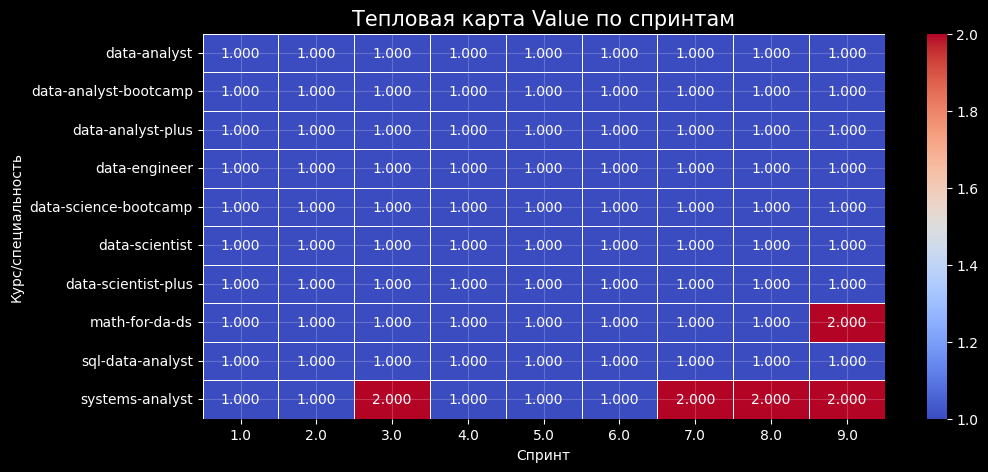

In [ ]:
#Тепловая карта Value по спринтам
sns.heatmap(sprint_values, annot=True, linewidths=.5, fmt='.3f', cmap=cmap)
plt.title('Тепловая карта Value по спринтам')
plt.xlabel('Спринт')
plt.ylabel('Курс/специальность')
plt.show()

Уверенность студентов выше нуля, это тоже хороший знак. Однако тут тоже виден спринт, где увреность студентов падает. Но посмотрим пользователей,у которых хороший LP, value уменьшился по сравнению с фри-треком

In [ ]:
#первое значение lp на фри треке
lp_avg_user_f = hackathon_metrics.groupby(['user_id', 'profession_name'], as_index=False).agg({'lp_avg_user': ['first']})
#последнее значение lp на спринте
lp_avg_user_l = hackathon_metrics.groupby(['user_id', 'profession_name'], as_index=False).agg({'lp_avg_user': ['last']})
#объединяем данные   
merged_lp = lp_avg_user_f.merge(lp_avg_user_l [[
    'user_id', 'profession_name', 'lp_avg_user']], on=['user_id', 'profession_name'], how='left')
merged_lp.drop_duplicates(inplace=True)
merged_lp.columns = ['user_id', 'profession_name', 'first', 'last']
merged_lp

,user_id,profession_name,first,last
0,377,data-scientist,0.870000,0.794
1,774,data-analyst-plus,0.666000,0.666
2,802,data-analyst,0.773333,0.865
3,1282,data-analyst,0.670000,0.570
4,1400,data-scientist,0.727143,0.750
...,...,...,...,...
11845,16098368,data-analyst,0.722500,0.790
11846,16098455,data-scientist,0.687500,0.750
11847,16099590,data-analyst,0.806000,0.810
11848,16100018,data-analyst-bootcamp,0.800000,0.635


In [ ]:
#Создадим отдельное поле с отрицательным LP
merged_lp['compare'] = merged_lp['last'] - merged_lp['first']
merged_lp[merged_lp['compare'] < 0]

,user_id,profession_name,first,last,compare
0,377,data-scientist,0.870000,0.794000,-0.076000
3,1282,data-analyst,0.670000,0.570000,-0.100000
5,1641,systems-analyst,0.950000,0.906000,-0.044000
12,2496,data-scientist,0.727500,0.720000,-0.007500
14,3157,data-analyst,0.670000,0.652222,-0.017778
...,...,...,...,...,...
11829,16052314,systems-analyst,0.970000,0.903333,-0.066667
11831,16064946,data-analyst-bootcamp,0.910000,0.795000,-0.115000
11835,16080568,data-scientist,0.783333,0.725000,-0.058333
11838,16081686,systems-analyst,0.955000,0.930000,-0.025000


In [ ]:
# посмотрим на соотношение общего числа пользователей и с отрицательным значением lp 
df_rate = (pd.concat([merged_lp.groupby('profession_name')['compare'].count().sort_index(), 
                 merged_lp[merged_lp['compare'] < 0].groupby('profession_name')['user_id'].count().sort_index()], 
                axis= 1 )
     )
df_rate.columns = ['all_students', 'negative_lp']
df_rate['rate, %'] = df_rate['negative_lp']/df_rate['all_students']*100
df_rate.style.format("{:,.0f}")

,all_students,negative_lp,"rate, %"
profession_name,,,
data-analyst,"4,566","1,831",40
data-analyst-bootcamp,113,33,29
data-analyst-plus,589,176,30
data-engineer,368,100,27
data-science-bootcamp,82,nan,nan
data-scientist,"3,679","1,399",38
data-scientist-plus,554,123,22
math-for-da-ds,421,35,8
sql-data-analyst,696,127,18


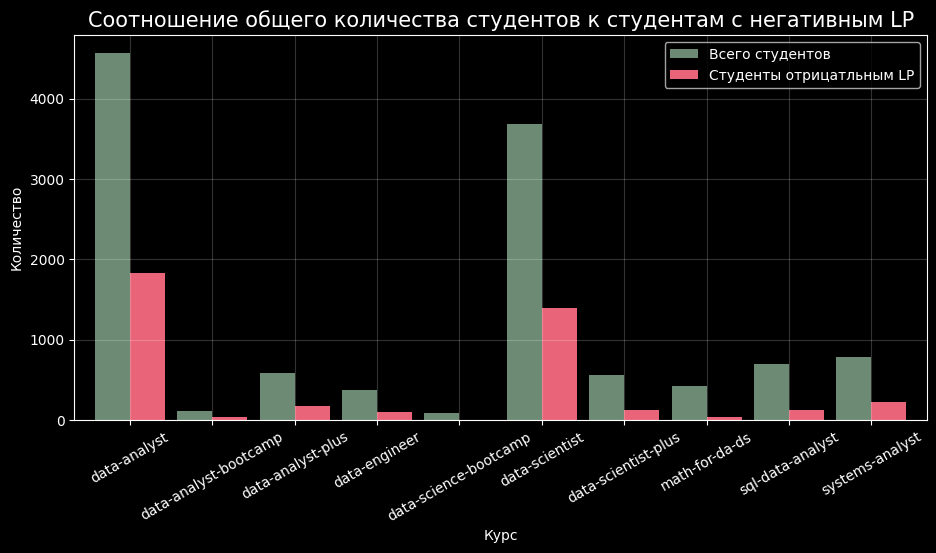

In [ ]:
#Визуализируем соотношение общего числа и негативных
df_rate[['all_students', 'negative_lp']].plot.bar(color = ['#6D8B74','#E96479'],  width=0.85)
plt.title('Соотношение общего количества студентов к студентам с негативным LP')
plt.legend(['Всего студентов', 'Студенты с отрицатльным LP'])
plt.ylabel('Количество')
plt.xlabel('Курс')
plt.xticks(rotation = 30)
plt.show()

In [ ]:
#соберм пользователей, у которых негативный lp
list_lp_negative = merged_lp[merged_lp['compare'] < 0]['user_id'].to_list()

In [ ]:
#Посмотрим, как они проходили спринты
lp_negative = hackathon_metrics.query('user_id.isin(@list_lp_negative)').pivot_table(index='profession_name', 
                             columns = ['sprint'], 
                             values = 'lp_avg_user', 
                             aggfunc = 'median')
lp_negative

sprint,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0
profession_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
data-analyst,0.746667,0.735,0.730000,0.720000,0.720000,0.687846,0.667083,0.663333,0.666333,0.664545,0.666667,0.666000,0.676308,0.676308,0.678000,0.672479,0.669006,0.669006,0.647159,0.647159,0.647159,0.6525,0.678333,0.678333,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.45,0.45,NaN,NaN,NaN,NaN
data-analyst-bootcamp,0.820000,0.810,0.810000,0.786667,0.820000,0.800000,0.780000,0.780000,0.740000,0.740000,0.730000,0.730000,0.717500,0.717500,0.705000,0.705000,0.715000,0.715000,0.730000,0.730000,0.365000,0.3650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-analyst-plus,0.780000,0.770,0.756500,0.750000,0.712917,0.712500,0.711250,0.711250,0.740000,0.742857,0.660000,0.660000,0.560000,0.560000,0.560000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-engineer,0.876000,0.870,0.865714,0.863929,0.870000,0.870625,0.870000,0.872381,0.858286,0.858286,0.858000,0.858000,0.860714,0.860714,0.858286,0.838929,0.820714,0.820714,0.820714,0.820714,0.820000,0.8200,0.820000,0.820000,0.821429,0.821429,0.821429,0.821429,0.821429,0.821429,0.81,0.81,0.81,0.81,0.81,0.81
data-science-bootcamp,0.760000,0.745,0.665000,0.605000,0.605000,0.535000,0.535000,0.550000,0.550000,0.550000,0.550000,0.550000,0.550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-scientist,0.760000,0.750,0.750000,0.740000,0.740000,0.710000,0.670000,0.662857,0.664476,0.663333,0.663929,0.663929,0.665625,0.665625,0.686333,0.676667,0.676667,0.676667,0.655455,0.655455,0.680909,0.7100,0.710000,0.710000,0.719000,0.719000,0.719000,0.719000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-scientist-plus,0.800000,0.790,0.790000,0.774583,0.744167,0.735000,0.744167,0.744167,0.726607,0.707857,0.670000,0.670000,0.637083,0.637083,0.637083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math-for-da-ds,0.680000,0.673,0.630000,0.620000,0.620000,0.620000,0.680000,0.681667,0.683333,0.683333,0.715000,0.715000,0.711667,0.680000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.6200,0.620000,0.620000,0.620000,0.620000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sql-data-analyst,0.930000,0.890,0.890000,0.890000,0.890000,0.890000,0.865000,0.835000,0.865000,0.865000,0.890000,0.910000,0.816667,0.670000,0.670000,0.670000,0.770000,0.770000,0.770000,0.770000,0.770000,0.7700,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.77,0.77,NaN,NaN,NaN,NaN


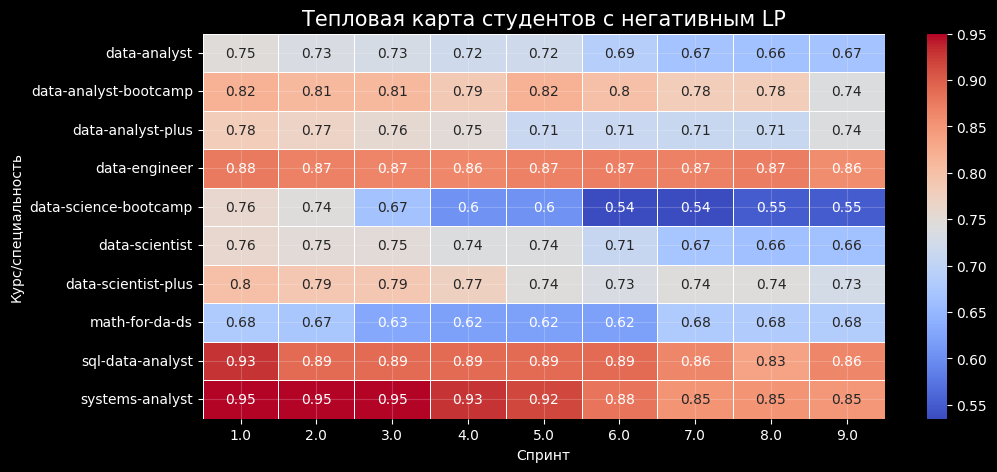

In [ ]:
#Визуализирум данные
sns.heatmap(lp_negative.iloc[:,0:9], annot=True, linewidths=.5, cmap=cmap)
plt.title('Тепловая карта студентов с негативным LP')
plt.xlabel('Спринт')
plt.ylabel('Курс/специальность')
plt.show()

У пользователей с отрицательными значениями LP, хорошо видны провалы по спринтам. 
Показательно вышлядит по курсу Дата Аналитик, что если ты не усвоил 4 спринт, то дальше наступают жесткие дедлайны и успеть/наверстать просто не получается.... 

Было определено:
Наличие спринтов, после которых идт падение LP. Хороший пример — это специальность Дата Аналитик. После 4 и 6 спринтов идет сильное падние.
Курсы системого аналитика и анадитика данных sql, выглядят боле стабильными. Это можт быть по двум причинам: 1. Выше уровень подготовки. 2. Более сбалансированный курс.
Из 11850 студентов, 4045 имеют отрицательную динамику роста LP. У Аналитиков Данных 40% учащихся испытывают проблемы в обучении.
Курс data-science-bootcamp не имеет отрицательных LP, что косвенно говорит об удовлетворенности студентов
Было также обнаружено, если студент встречатся с сложным (плохо описанным) спринтом, то большиство студентов имют тенденцию к дальнейшнму снижению LP и снижению мотивации.

Рекомендации:
Чтобы снизить репутационные риски, пересмотрть критичные спринуты. Так как практически половина ользователей недовольна.
Работать над снижением показателя неудовлетворенности через вебинары. мотивировать кураторов на повышения вовлеченночти на повышение удовлтворенности/успеваемости студентов.
Проявить в првую очередь внимание студентам на курсах Дата Аналитик и Дата-сайентист. 

#### Отличия в изменении LP у студентов, которые на трэке трудоустройство

In [ ]:

#определим студентов, которые на трэке трудоустройство
dga_user = data_goals_answers['user_id'].unique().tolist()
#выберем значения первого и последнего LP для них
merged_lp_work = merged_lp.query('user_id.isin(@dga_user)')

#определим соотношение всего студентов и студентов с негативным LP
df_rate_work = (pd.concat([merged_lp_work.groupby('profession_name')['compare'].count().sort_index(), 
                merged_lp_work[merged_lp_work['compare'] < 0].groupby('profession_name')['user_id'].count().sort_index()], 
                axis= 1 )
     )
df_rate_work.columns = ['all_students', 'negative_lp']
df_rate_work['rate, %'] = df_rate['negative_lp']/df_rate['all_students']*100
df_rate_work.style.format("{:,.0f}")


,all_students,negative_lp,"rate, %"
profession_name,,,
data-analyst,"1,543",648,40
data-analyst-bootcamp,29,10,29
data-analyst-plus,215,66,30
data-engineer,47,7,27
data-science-bootcamp,12,nan,nan
data-scientist,"1,127",430,38
data-scientist-plus,99,15,22
math-for-da-ds,127,11,8
sql-data-analyst,259,54,18


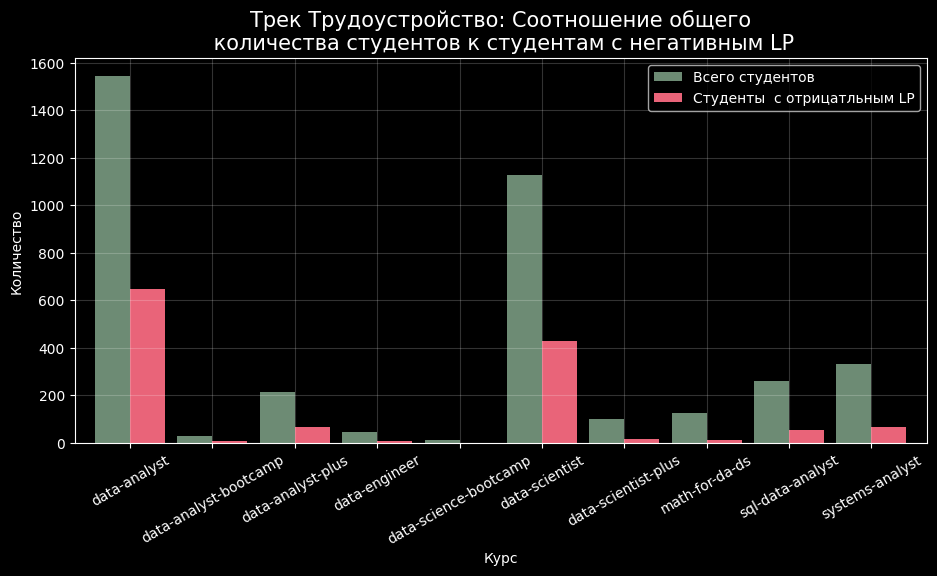

In [ ]:
#Визуализируем соотношение общего числа и негативных для тех, кто на курсе
df_rate_work[['all_students', 'negative_lp']].plot.bar(color = ['#6D8B74','#E96479'],  width=0.85)
plt.title('Трек Трудоустройство: Соотношение общего'+ '\n' +' количества студентов к студентам с негативным LP')
plt.legend(['Всего студентов', 'Студенты  с отрицатльным LP'])
plt.ylabel('Количество')
plt.xlabel('Курс')
plt.xticks(rotation = 30)
plt.show()

Данные схожи с данными по всем студентам.

In [ ]:
#соберем пользователей, у котрых негативный lp
list_lp_negative_work = merged_lp_work[merged_lp_work['compare'] < 0]['user_id'].to_list()
#Посмотрим, как они проходили спринты
lp_negative_work = hackathon_metrics.query('user_id.isin(@list_lp_negative_work)').pivot_table(index='profession_name', 
                             columns = ['sprint'], 
                             values = 'lp_avg_user', 
                             aggfunc = 'median')
lp_negative_work

sprint,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0
profession_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
data-analyst,0.747000,0.742455,0.740000,0.739000,0.730000,0.700909,0.659545,0.655833,0.659545,0.659091,0.667857,0.666667,0.682318,0.682318,0.661111,0.657639,0.674583,0.674583,0.625076,0.625076,0.625076,0.641818,0.587917,0.587917,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45
data-analyst-bootcamp,0.820000,0.820000,0.800000,0.760000,0.770000,0.770000,0.820000,0.820000,0.820000,0.820000,0.740000,0.740000,0.720000,0.720000,0.720000,0.720000,0.720000,0.720000,0.720000,0.720000,0.365000,0.365000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-analyst-plus,0.790000,0.795000,0.777500,0.755000,0.713750,0.713750,0.695000,0.695000,0.745714,0.745714,0.695833,0.695833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-engineer,0.766667,0.788333,0.788333,0.788333,0.798333,0.804167,0.885000,0.882500,0.845000,0.845000,0.836250,0.836250,0.880000,0.880000,0.845536,0.845536,0.792500,0.792500,0.792500,0.792500,0.792500,0.792500,0.792500,0.792500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-science-bootcamp,0.550000,0.550000,0.550000,0.550000,0.550000,0.535000,0.535000,0.550000,0.550000,0.550000,0.550000,0.550000,0.550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-scientist,0.762500,0.760000,0.760000,0.760000,0.760000,0.726667,0.659167,0.647500,0.650000,0.650000,0.644167,0.644167,0.643939,0.643939,0.636667,0.643333,0.636667,0.636667,0.630000,0.630000,0.655455,0.630000,0.630000,0.630000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data-scientist-plus,0.760000,0.760000,0.760000,0.730000,0.730000,0.727778,0.711250,0.711250,0.760000,0.760000,0.766667,0.766667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math-for-da-ds,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.680000,0.681667,0.681667,0.681667,0.681667,0.681667,0.683333,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.620000,0.62,0.62,NaN,NaN,NaN,NaN,NaN,NaN
sql-data-analyst,0.930000,0.920000,0.890000,0.890000,0.890000,0.890000,0.840000,0.830000,0.835000,0.835000,0.830000,0.873333,0.816667,0.670000,0.670000,0.670000,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77


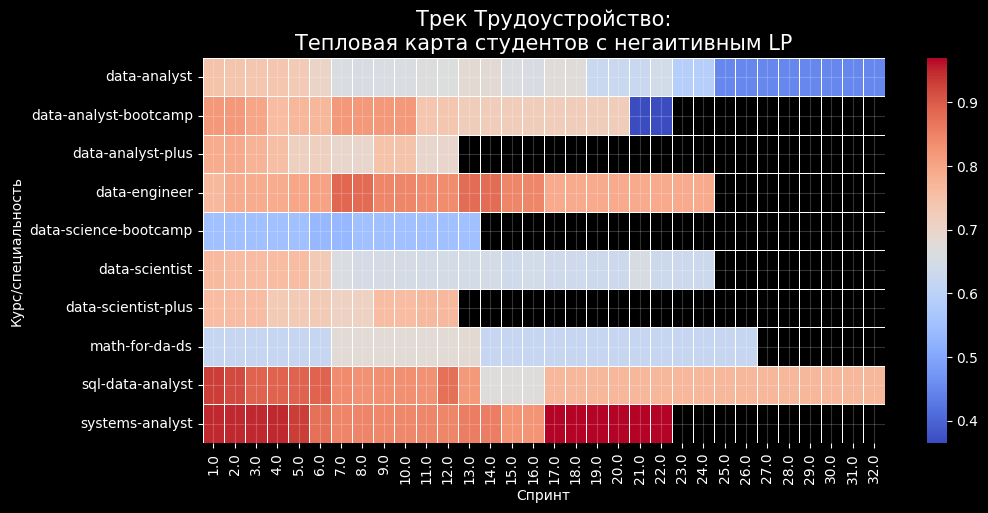

In [ ]:
#визуализирум данные
sns.heatmap(lp_negative_work, annot=False, linewidths=.5, cmap=cmap)
plt.title('Трек Трудоустройство:'+ '\n'+ 'Тепловая карта студентов с негативным LP')
plt.xlabel('Спринт')
plt.ylabel('Курс/специальность')
plt.show()

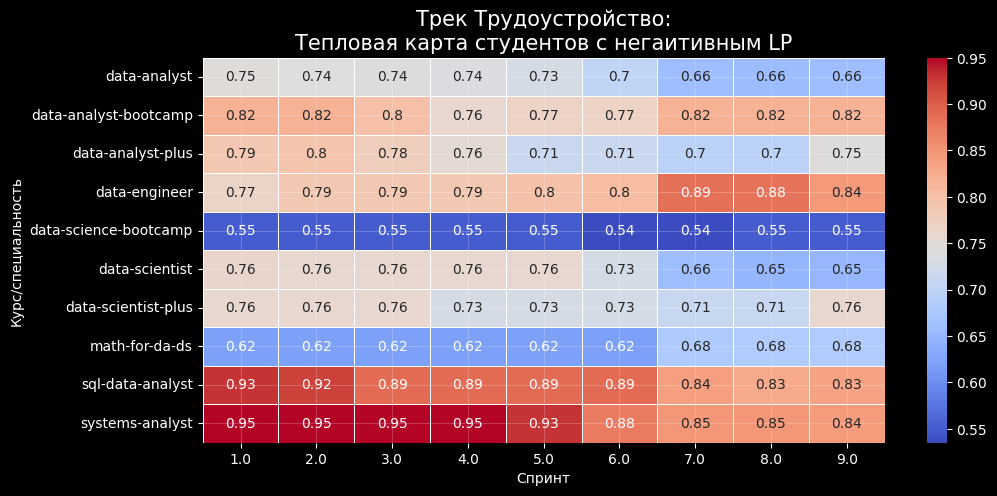

In [ ]:
#для наглядоности ограничим данные только 9 спринтами
sns.heatmap(lp_negative_work.iloc[:,0:9], annot=True, linewidths=.5, cmap=cmap)
plt.title('Трек Трудоустройство:'+ '\n'+ 'Тепловая карта студентов с негативным LP')
plt.xlabel('Спринт')
plt.ylabel('Курс/специальность')
plt.show()

Тепловая диаграмма зачительно светло-голубеe, чем по всем студентам. Но в остальном основные выводы схожи с общим поведением LP по студентам 

In [ ]:
#определим студентов с карьерного трека в сгменте b2b
answer_current = data_goals_answers.groupby(['user_id', 'profession_name'], as_index=False).agg({'current_segment': 'last'})
list_btb = answer_current.query('current_segment == "b2b"')['user_id'].tolist()


In [ ]:
#сформируем более полную таблицу для анализа данных
merged_all = (hackathon_metrics.groupby(['user_id','profession_name'])
             .agg({"lp_avg_user":['first','last'],
                   "value":['count','mean','std'],
                   'user_answer':['count','mean','min','std'],
                   'sprint':['last']})
             .set_axis(['lp_f','lp_l','lx_count','lx_mean',
                        'lx_std','nps_count','nps_mean','nps_min','nps_std', 'sprint_l'], axis=1)
            )
merged_all.reset_index(inplace= True)
merged_all

,user_id,profession_name,lp_f,lp_l,lx_count,lx_mean,lx_std,nps_count,nps_mean,nps_min,nps_std,sprint_l
0,377,data-scientist,0.870000,0.794,6,1.333333,0.516398,0,NaN,NaN,NaN,6.0
1,774,data-analyst-plus,0.666000,0.666,1,0.000000,NaN,0,NaN,NaN,NaN,1.0
2,802,data-analyst,0.773333,0.865,3,0.000000,0.000000,0,NaN,NaN,NaN,3.0
3,1282,data-analyst,0.670000,0.570,4,0.500000,0.577350,0,NaN,NaN,NaN,4.0
4,1400,data-scientist,0.727143,0.750,8,0.250000,0.462910,0,NaN,NaN,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11845,16098368,data-analyst,0.722500,0.790,2,0.000000,0.000000,0,NaN,NaN,NaN,2.0
11846,16098455,data-scientist,0.687500,0.750,2,0.000000,0.000000,0,NaN,NaN,NaN,2.0
11847,16099590,data-analyst,0.806000,0.810,2,1.000000,0.000000,0,NaN,NaN,NaN,2.0
11848,16100018,data-analyst-bootcamp,0.800000,0.635,2,0.000000,0.000000,0,NaN,NaN,NaN,2.0


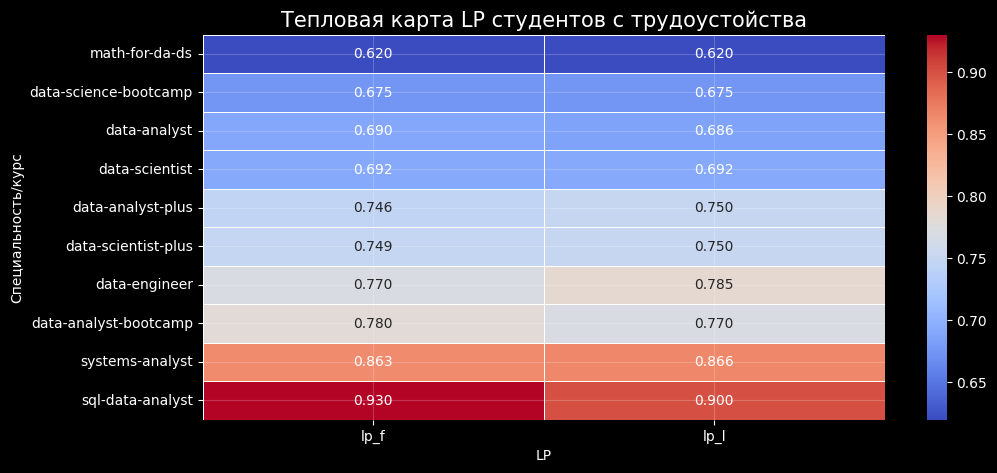

In [ ]:
#Опредлим LP на фри трэке и платном трэке
list_work=data_goals_answers.user_id.unique().tolist()
sns.heatmap(merged_all.query('user_id.isin(@list_work)').groupby('profession_name')['lp_f','lp_l'].median().sort_values('lp_f'), annot=True, linewidths=.5, fmt='.3f', cmap=cmap)
plt.title('Тепловая карта LP студентов с трудоустойства')
plt.ylabel('Специальность/курс')
plt.xlabel('LP');

Видны специальности, где есть падение LP. Это потенциально может говорить об отсутствии сбалансированности. Нужно стремиться к росту LP после прохождения платной части.

In [ ]:
#Посмотрим пользователей b2b сегмента
merged_all.query('user_id.isin(@list_btb)')

,user_id,profession_name,lp_f,lp_l,lx_count,lx_mean,lx_std,nps_count,nps_mean,nps_min,nps_std,sprint_l
575,276717,systems-analyst,0.812222,0.812222,5,0.800000,1.095445,0,NaN,NaN,NaN,5.0
798,416706,systems-analyst,0.828889,0.930000,12,1.500000,0.522233,0,NaN,NaN,NaN,12.0
801,418740,data-scientist,0.602000,0.602000,18,0.777778,1.165966,0,NaN,NaN,NaN,18.0
802,418740,math-for-da-ds,0.620000,0.620000,9,0.777778,1.201850,0,NaN,NaN,NaN,9.0
803,418740,sql-data-analyst,0.930000,0.930000,9,0.777778,1.201850,0,NaN,NaN,NaN,9.0
2661,2636668,data-analyst,0.638000,0.680000,10,-0.400000,0.516398,0,NaN,NaN,NaN,10.0
3946,6674275,data-analyst,0.790000,0.800000,10,-0.200000,1.032796,0,NaN,NaN,NaN,10.0
4636,10856522,data-analyst,0.490000,0.500000,12,1.500000,0.522233,12,10.0,10.0,0.0,12.0
4912,12092834,data-scientist,0.760000,0.625000,12,0.833333,0.389249,0,NaN,NaN,NaN,12.0
5286,12866537,data-analyst-plus,0.737143,0.737143,9,0.666667,0.500000,0,NaN,NaN,NaN,9.0


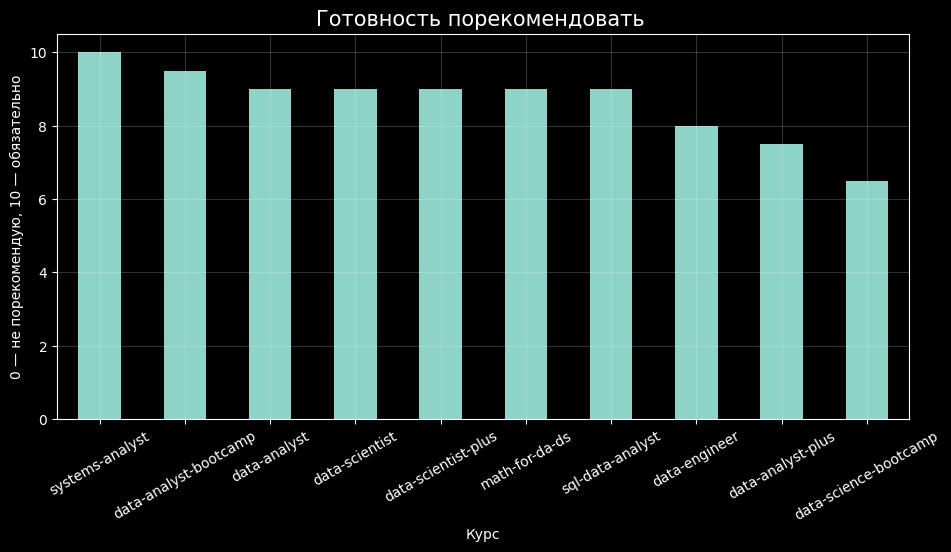

In [ ]:
#определим готовность рекомендовать по курсам
merged_all.query('user_id.isin(@list_work)').groupby('profession_name')['nps_mean'].median().sort_values(ascending = False).plot.bar()
plt.title('Готовность порекомендовать ')
plt.ylabel('0 — не порекомендую, 10 — обязательно')
plt.xlabel('Курс')
plt.xticks(rotation = 30)
plt.show();

Студенты на курс data-science-bootcamp имеют ниже всего готовность к рекомендациям курса. Есть о чем задуматься и над чем поработать.

### Объединение таблиц и изучение данных по студентам, дошедшим до карьерного трека

In [ ]:
#Подготовим справочик для обогащения даных из спринта трудоустройства, данными оlp_avg_user — средний learning performance value
data_lp = hackathon_metrics.copy()

In [ ]:
#Отберем необходимые данные для спринта трудоустройство. Последнее начение lp_avg_user и среднее значение value
dict_lp = data_lp.groupby(['user_id', 'profession_name'], as_index=False).agg({'lp_avg_user': 'last','value' : 'median' })
dict_lp.columns = ['user_id', 'profession_name', 'lp_avg_user', 'statement_value'] 
dict_lp

,user_id,profession_name,lp_avg_user,statement_value
0,377,data-scientist,0.794,1.0
1,774,data-analyst-plus,0.666,0.0
2,802,data-analyst,0.865,0.0
3,1282,data-analyst,0.570,0.5
4,1400,data-scientist,0.750,0.0
...,...,...,...,...
11845,16098368,data-analyst,0.790,0.0
11846,16098455,data-scientist,0.750,0.0
11847,16099590,data-analyst,0.810,1.0
11848,16100018,data-analyst-bootcamp,0.635,0.0


In [ ]:
# джойним таблицы
merged_df = data_goals_answers.merge(dict_lp[[
    'user_id', 'profession_name', 'lp_avg_user']], on=['user_id', 'profession_name'], how='left')

#### Обзор общей информации по студентам, дошедшим до карьерного трека

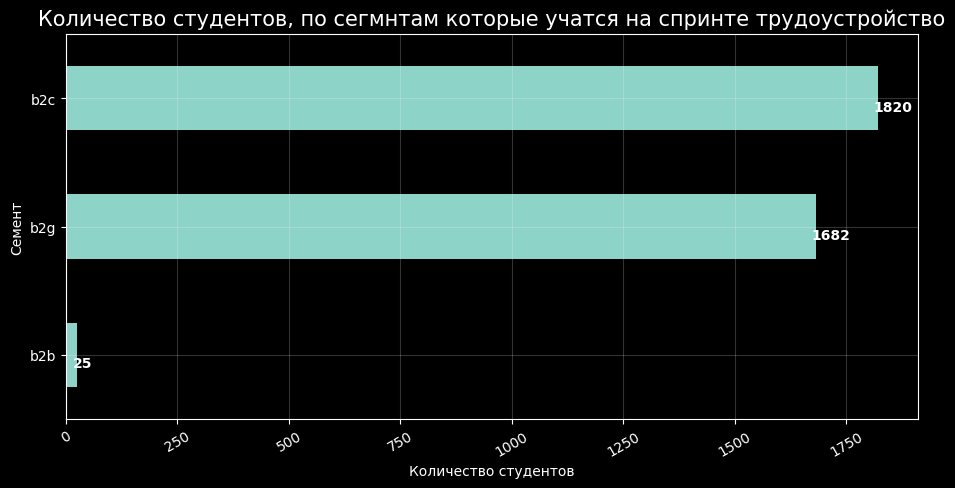

In [ ]:
#определим количество студентотов на трэке трубоустройство
count_segment = merged_df.groupby('current_segment')['user_id'].nunique().sort_values()

fig, ax = plt.subplots()
count_segment.plot.barh()
count = count_segment.tolist()
for i, v in enumerate(count):
    ax.text(v-10, i-0.1 , str(v), color='white', fontweight='bold')
plt.title('Количество студентов, по сегментам которые учатся на спринте трудоустройство')
plt.xlabel('Количество студентов')
plt.ylabel('Семент')
plt.xticks(rotation = 30)
plt.show()

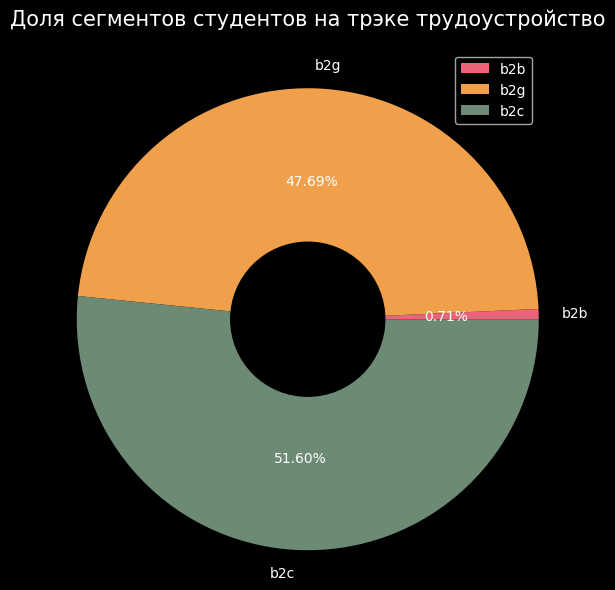

In [ ]:
#визуализируем соотношения категорий общественного питания 
labels = count_segment .index 
plt.pie(count_segment , labels = labels, 
        colors = ['#E96479', '#F0A04B', '#6D8B74'],
        autopct='%1.2f%%',
        radius =1.5
        )

my_circle = plt.Circle( (0,0), 0.5, color='black')
p = plt.gcf()
plt.legend(labels, loc="upper right", bbox_to_anchor=(1.1, 1.2))
p.gca().add_artist(my_circle)
plt.title('Доля сегментов студентов на трэке трудоустройство' + '\n'*4, size=15)
plt.show()

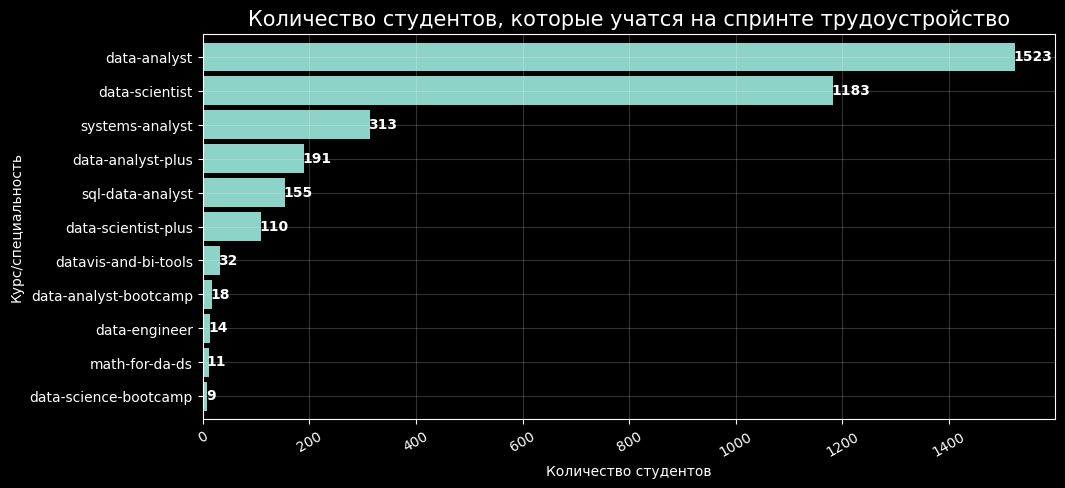

In [ ]:
#определим количество студентотов на трэке трудоустройство по сегмтам 
count_proffession = merged_df.groupby('profession_name')['user_id'].nunique().sort_values()

fig, ax = plt.subplots()
count_proffession.plot.barh(width=0.85)
count = count_proffession.tolist()
for i, v in enumerate(count):
    ax.text(v-3, i-0.1 , str(v), color='white', fontweight='bold')
plt.title('Количество студентов, которые учатся на спринте трудоустройство')
plt.xlabel('Количество студентов')
plt.ylabel('Курс/специальность')
plt.xticks(rotation = 30)
plt.show()

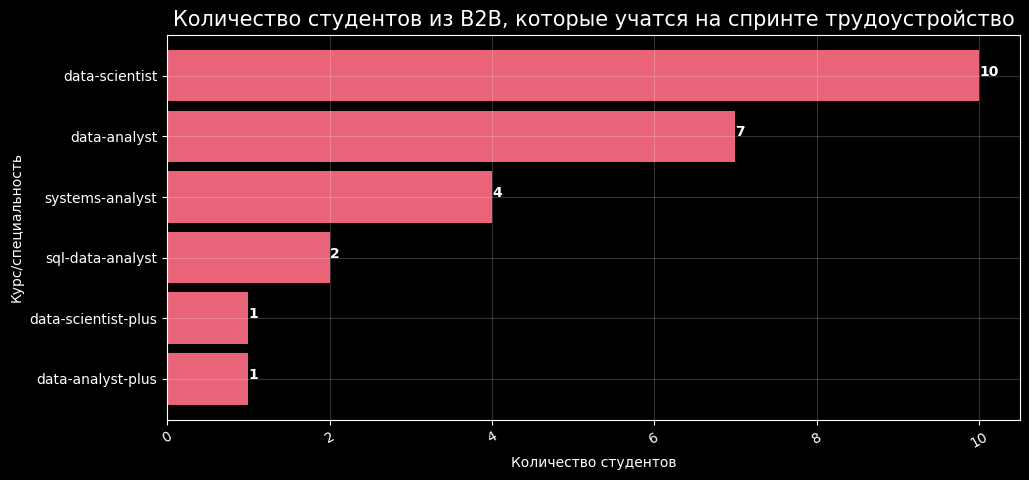

In [ ]:
#определим количество студентотов на трэке трубоустройство по сегмтам 
count_proffession_btb = merged_df.query('current_segment == "b2b"').groupby('profession_name')['user_id'].nunique().sort_values()

fig, ax = plt.subplots()
count_proffession_btb.plot.barh(width=0.85, color = ['#E96479'])
count = count_proffession_btb.tolist()
for i, v in enumerate(count):
    ax.text(v, i , str(v), color='white', fontweight='bold')
plt.title('Количество студентов из B2B, которые учатся на спринте трудоустройство')
plt.xlabel('Количество студентов')
plt.ylabel('Курс/специальность')
plt.xticks(rotation = 30)
plt.show()

Посмотрим варианты ответов для каждого вопроса в разрезе сегмента и как отвечали студенты.

In [ ]:
# зададим функцию отрисовки датафрейма + визуализации
def answers_cnt_df(question): 
    try:
        data = pd.DataFrame(merged_df[merged_df['question_title'] == question]. \
          groupby(['current_segment', 'user_answer'])['user_id'].nunique().reset_index())
        display(data) # выводим датафрейм
        fig3 = plt.figure(figsize=(14,7)) # строим визуализацию
        ax3 = sns.barplot(x='user_answer',
                          y='user_id',
                          data=data,
                          hue='current_segment')
        ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right', fontsize=12)
        ax3.set_title('Распределение кол-ва студентов по сегментам в зависимости от ответов на вопросы', fontsize=12)
        plt.xlabel('Ответы на вопросы', fontsize=12)
        plt.ylabel('Кол-во студентов', fontsize=12)
        plt.show()
    except:
        pass

,current_segment,user_answer,user_id
0,b2b,как говорить про повышение,9
1,b2b,как и куда можно расти как специалисту,10
2,b2b,"не думаю, что вы можете мне с чем-то помочь",2
3,b2b,определение профессиональной сферы,5
4,b2b,определение стратегии поиска работы,8
5,b2b,оформление портфолио,12
6,b2b,оценка шансов на трудоустройство,12
7,b2b,персональная карьерная консультация,12
8,b2b,прохождение собеседований,11
9,b2b,резюме,9


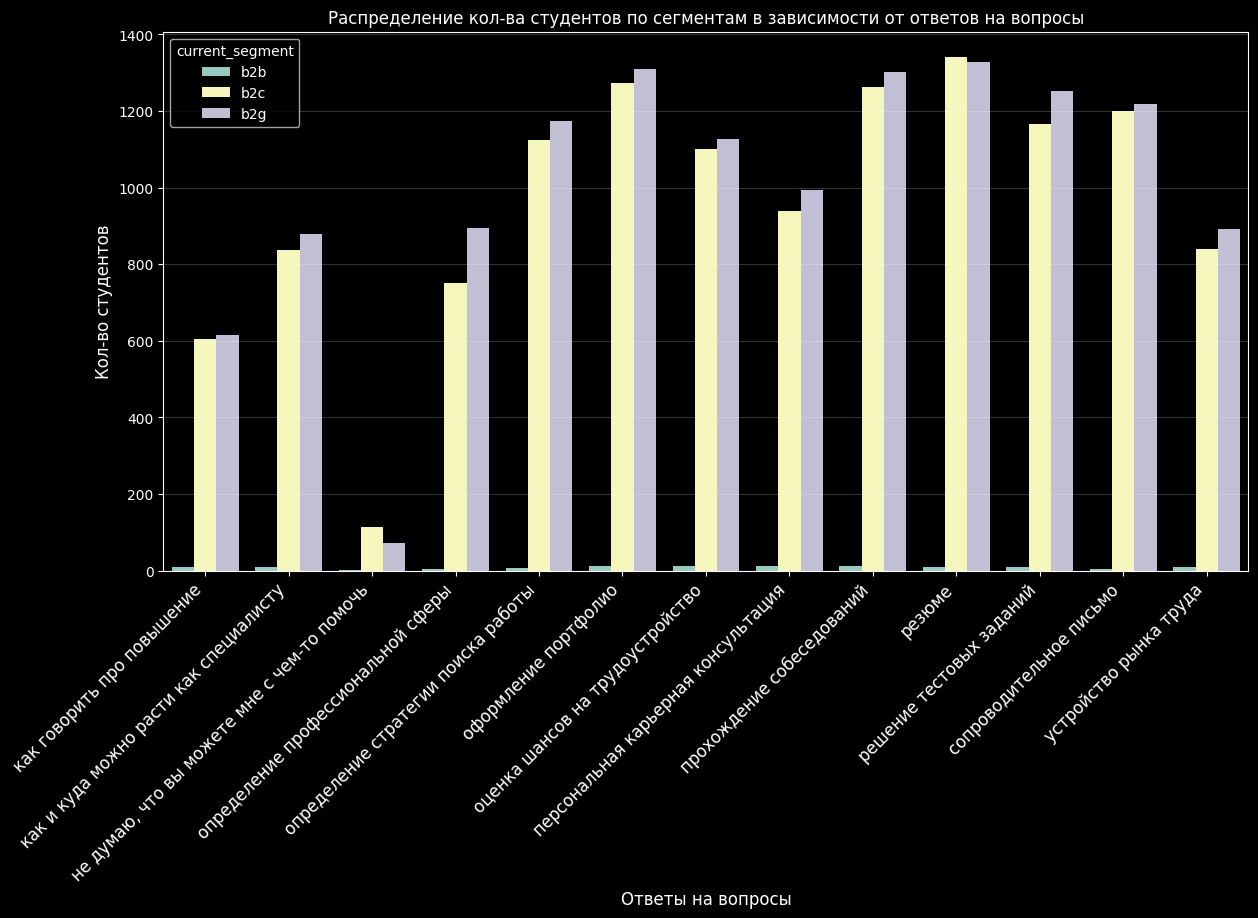

In [ ]:
answers_cnt_df('Для программы важно понять над чем вам нужно поработать. Не переживайте, вам будут доступны все опции.')

- Как видно из графиков, сегмент b2b является самым малочисленным по всем вопросам трудоустройства. Что асолютно логично, так как данные люди пришли от работодателя для увеличения своих квалификационных навыков, а не поиска работы.
- На вопрос о том, с чем студентам нужна помощь, сегменты b2c и b2g ведут себя практически одинаково.
- Топ 3 ответа в данной категории это: 
1. помощь в составлени резюме
2. оформление портфолио
3. помощь в прохождении собеседований.
- То есть та информация, с которой начинается знаковство HR-а и студента ЯП.

- Наименьшее кол-во людей как в b2c, так и в b2g отвечают, что помогать им нечем, они и так все знают.

,current_segment,user_answer,user_id
0,b2b,"Получить новые знания, чтобы повысить зарплату.",5
1,b2b,Получить новые навыки для общего развития.,3
2,b2b,Продвинуться по карьерной лестнице.,6
3,b2b,Сменить работу.,8
4,b2b,Структурировать уже полученные навыки и знания.,2
5,b2c,Нет определённой цели в обучении.,33
6,b2c,"Получить новые знания, чтобы повысить зарплату.",197
7,b2c,Получить новые навыки для общего развития.,217
8,b2c,Продвинуться по карьерной лестнице.,126
9,b2c,Развить свой бизнес.,19


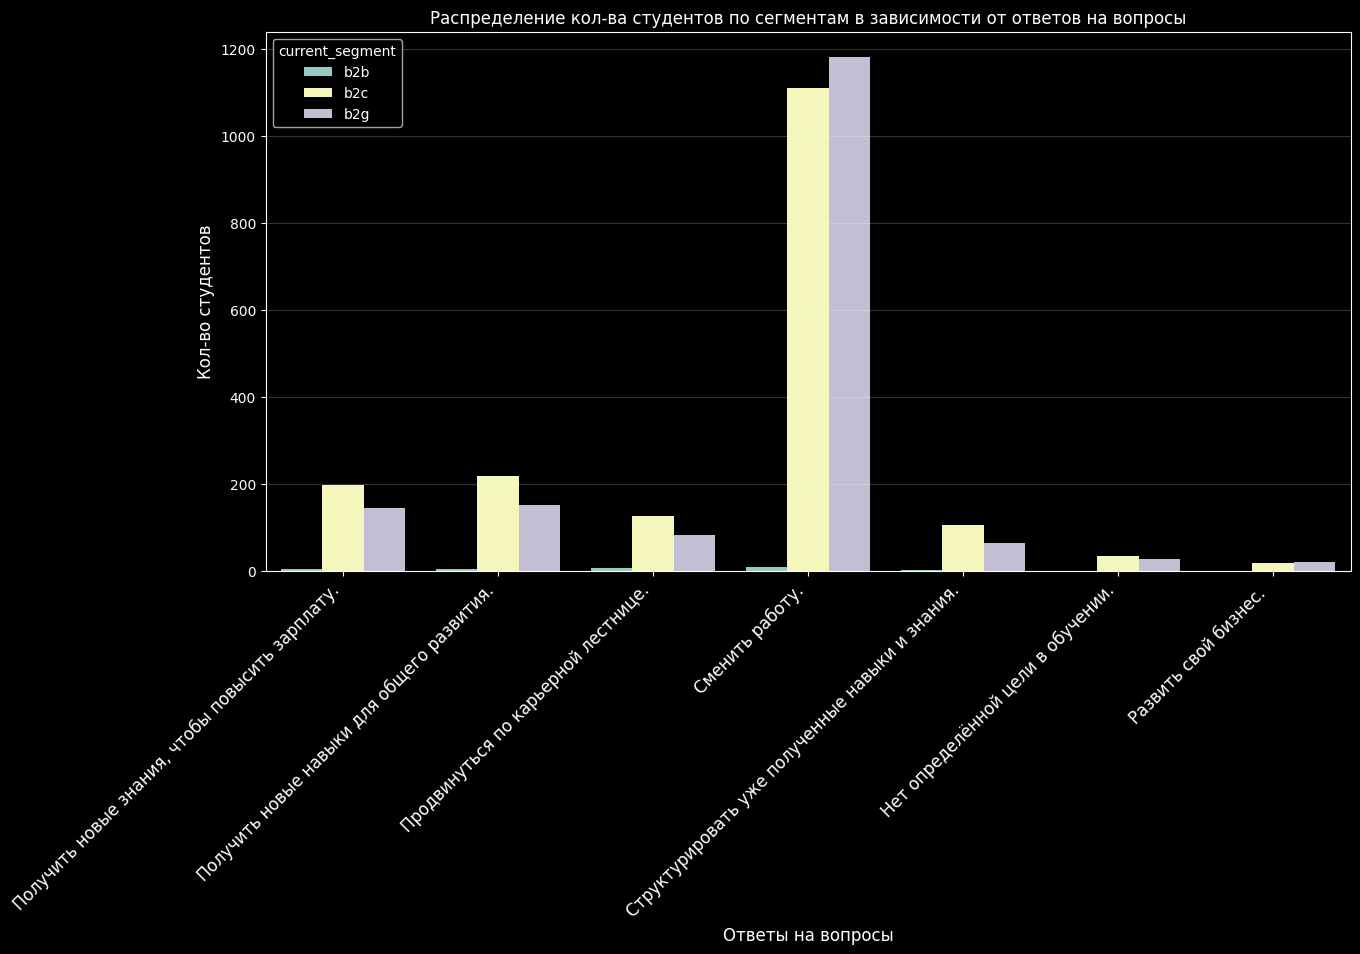

In [ ]:
answers_cnt_df('Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:')

- Так же, как и в предыдущем графике отметим, что сектор b2b является самым малочисленным или отсутствует в некоторых вопросах совсем.
- На данном графике опять можем отметить, что сегменты b2c и b2g ведут себя практически одинаково.
- Среди студентов превалируют люди, пришедшие с целью смены профессии.
- Наименьше кол-во студентов зафиксировано среди людей с целью развить свой бизнес и  среди людей без определенной цели в обучении.


,current_segment,user_answer,user_id
0,b2b,В активном поиске,1
1,b2b,Да,2
2,b2b,Нет,20
3,b2c,В активном поиске,303
4,b2c,Да,125
5,b2c,Нет,1350
6,b2g,В активном поиске,264
7,b2g,Да,75
8,b2g,Нет,1325


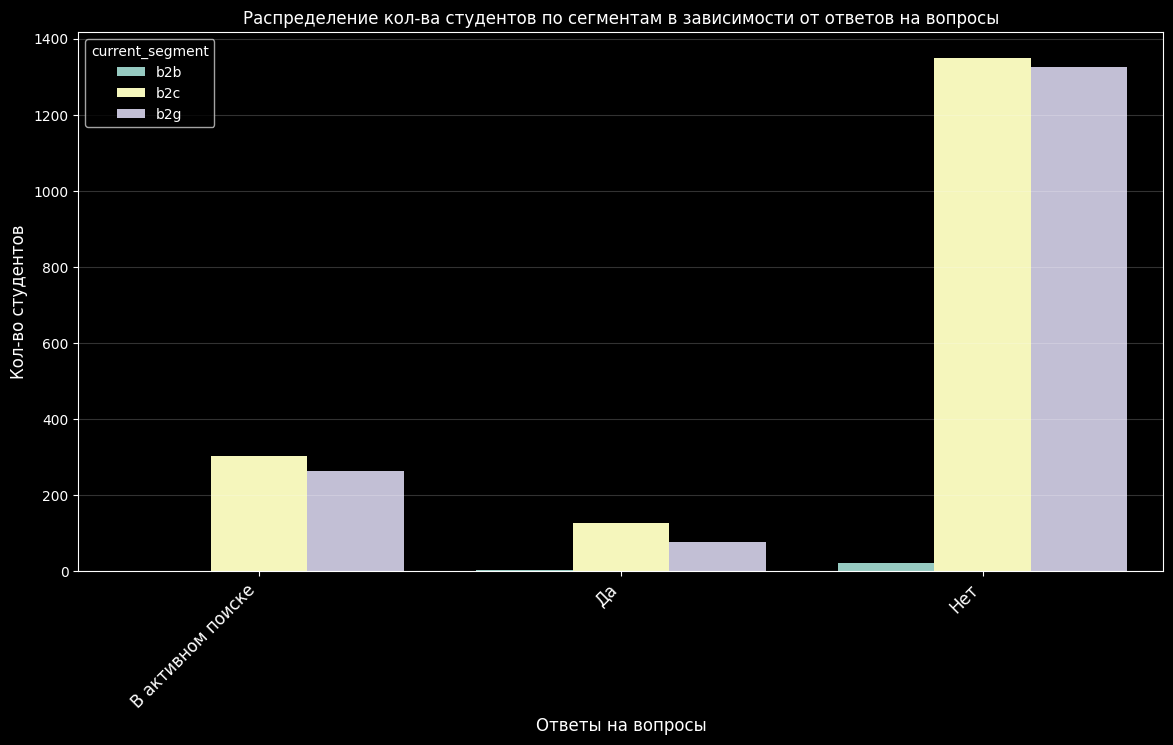

In [ ]:
answers_cnt_df('Возможно вы нашли работу за время обучения?')

- Работу за время обучения нашли 125 b2c и 75 b2g студентов.
- В активном поиске находятся 303 b2c и 264 b2g студентов.
- Еще не нашли работу 1350 b2c и 1325 b2g студентов.

,current_segment,user_answer,user_id
0,b2b,Более 3 лет опыта работы в направлении Анализа...,3
1,b2b,Менее года опыта работы аналитиком.,1
2,b2b,Менее года опыта работы в направлении Анализа ...,1
3,b2b,Нет опыта работы в IT и в направлении Анализа ...,10
4,b2b,От 1 года опыта работы в другом направлении IT.,7
5,b2b,От 1 до 3 лет опыта работы аналитиком.,2
6,b2b,От 1 до 3 лет опыта работы направлении Анализа...,1
7,b2c,Более 3 лет опыта работы аналитиком.,27
8,b2c,Более 3 лет опыта работы в направлении Анализа...,98
9,b2c,Менее 1 года опыта работы в другом направлении...,62


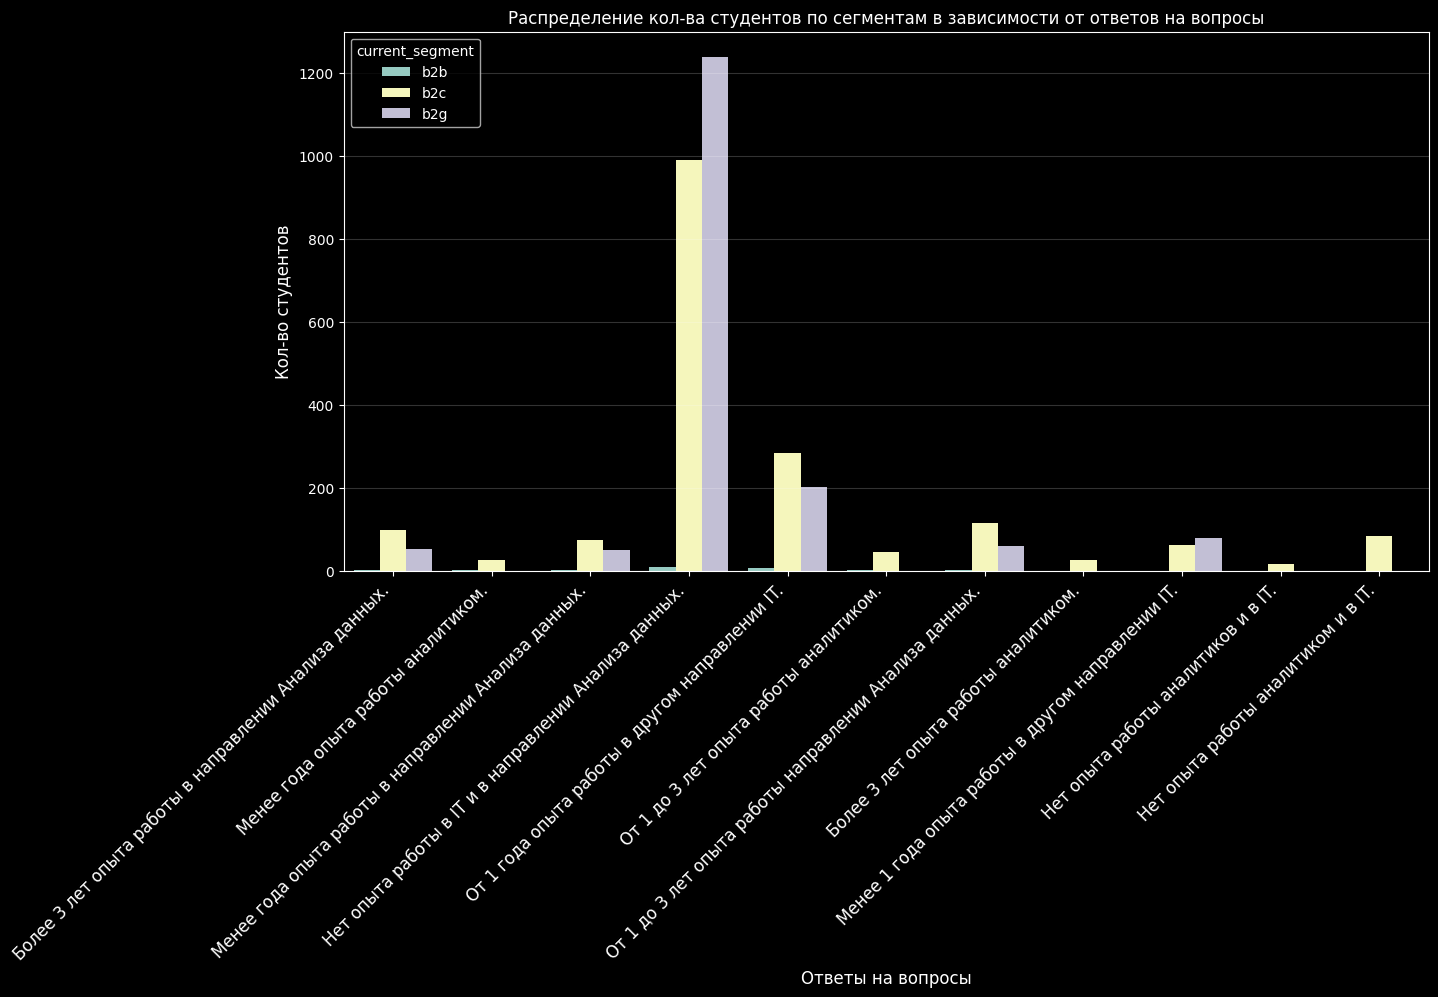

In [ ]:
answers_cnt_df('В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.')

- У большинства студентов нет никакого опыта в IT и в направлении Анализа данных.
- b2c - 1090 и b2g - 1238 студентов без опыта.
- Так же отчетливо видим, что совсем небльшие кол-ва людей уже имеют какой-то бэкграунд в IT, как на позиции аналитика, так и в других направлениях.

,current_segment,user_answer,user_id
0,b2b,"Да, планирую записаться после диплома",13
1,b2b,"Да, уже записался",3
2,b2b,"Нет, не планирую",8
3,b2c,"Да, планирую записаться после диплома",908
4,b2c,"Да, уже записался",693
5,b2c,"Нет, не планирую",202
6,b2g,"Да, планирую записаться после диплома",1008
7,b2g,"Да, уже записался",587
8,b2g,"Нет, не планирую",80


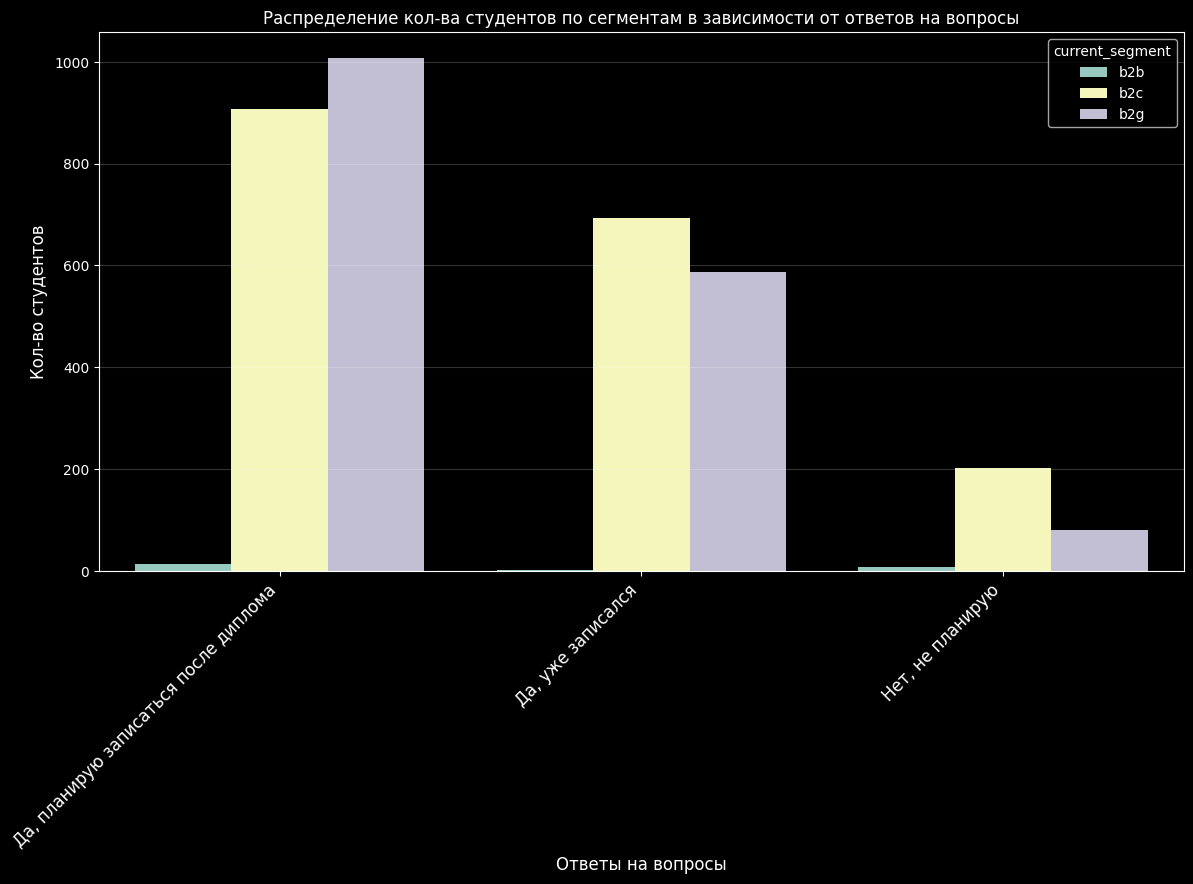

In [ ]:
answers_cnt_df('Планируете ли вы записаться на Карьерный Трек?')

- Большинство людей планируют записаться на карьерный трек после написания дипломной работы. Студенты сегмента b2c - 908, b2g - 1008 человек.
- Уже записались на карьерный трек b2c - 693, b2g - 587 человек. 
- Не планируют учавствовать в карьерном треке b2c- 202, b2g- 80 человек. Как видно из графика, таких людей меньшинство.


*В вопросе **"В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда"** есть повторяющиеся варианты ответа:*   
- Нет опыта работы в IT и в направлении Анализа данных   
- Нет опыта работы аналитиком и в IT   
- Нет опыта работы аналитиков и в IT 

*->приведем все к одной форме.*

In [ ]:
merged_df['user_answer'] = merged_df['user_answer'].apply(
    lambda x: 'Нет опыта работы в IT и в направлении Анализа данных.' if x in(
        ['Нет опыта работы аналитиком и в IT.', 'Нет опыта работы аналитиков и в IT.']) else x)

,current_segment,user_answer,user_id
0,b2b,Более 3 лет опыта работы в направлении Анализа...,3
1,b2b,Менее года опыта работы аналитиком.,1
2,b2b,Менее года опыта работы в направлении Анализа ...,1
3,b2b,Нет опыта работы в IT и в направлении Анализа ...,10
4,b2b,От 1 года опыта работы в другом направлении IT.,7
5,b2b,От 1 до 3 лет опыта работы аналитиком.,2
6,b2b,От 1 до 3 лет опыта работы направлении Анализа...,1
7,b2c,Более 3 лет опыта работы аналитиком.,27
8,b2c,Более 3 лет опыта работы в направлении Анализа...,98
9,b2c,Менее 1 года опыта работы в другом направлении...,62


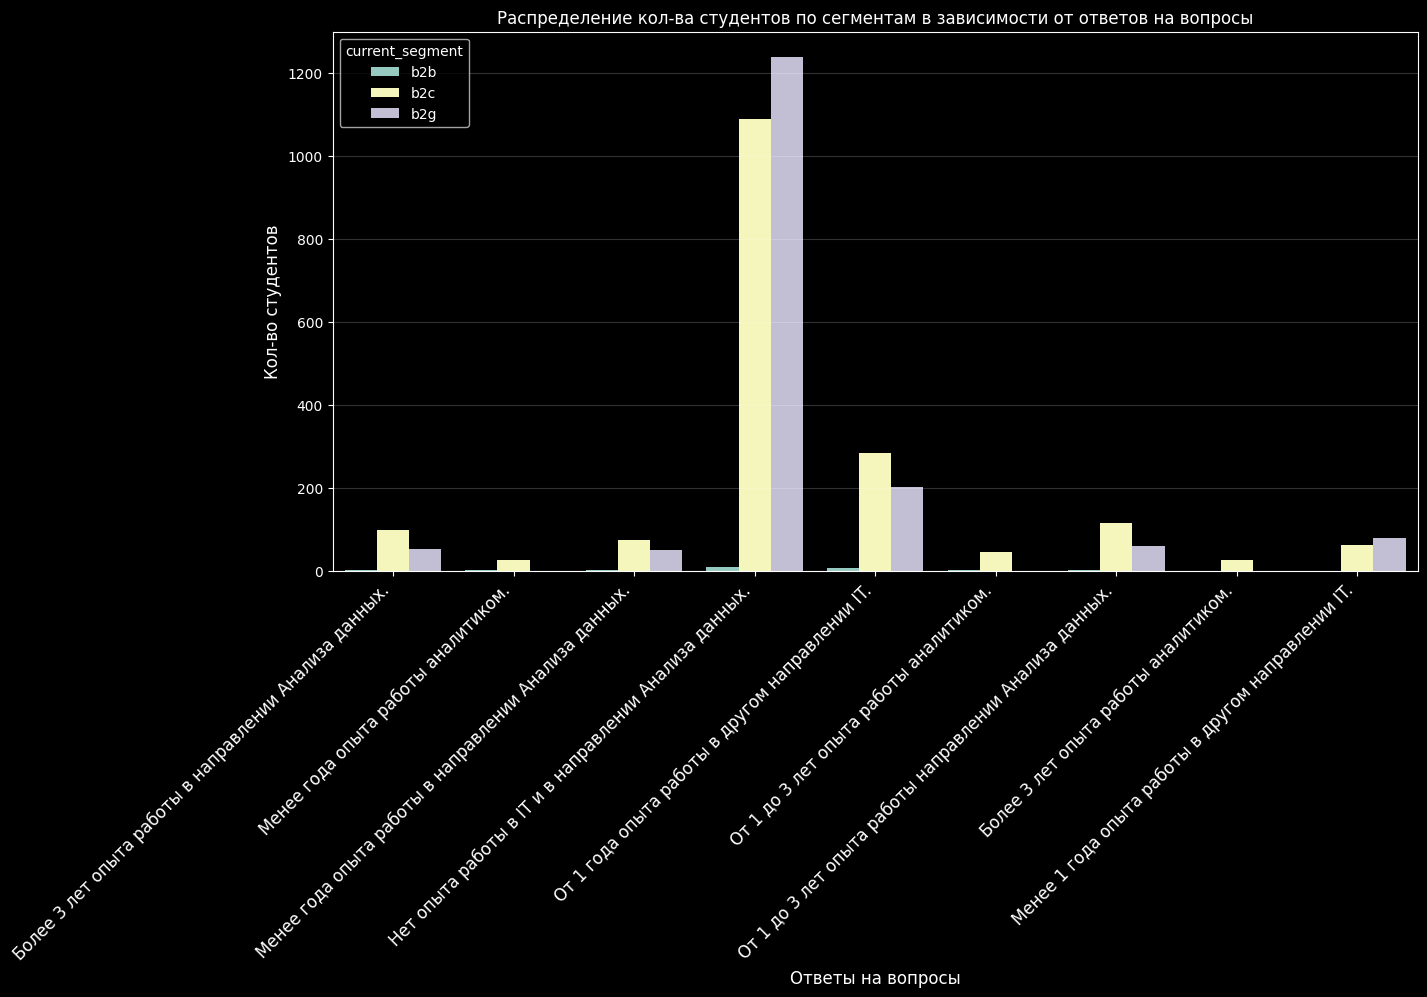

In [ ]:
answers_cnt_df('В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.')

##### Вывод

- Как видно из графиков сегмент b2b является самым малочисленным по всем вопросам трудоустройства. Что асолютно логично, так как данные люди пришли от работодателя для увеличения своих квалификационных навыков, а не поиска работы.
- Сегменты b2c и b2g ведут себя практически одинаково.
- Топ 3 ответа по вопросу того, с чем ЯП может помочь студенту звучат следующим образом: 
1. помощь в составлении резюме,
2. оформление портфолио,
3. помощь в прохождении собеседований.
- То есть та информация, с которой начинается знаковство HR-а и студента ЯП. Так как конкуренция на данный момент очень велика, каждый студент заинтересован в том, что бы выделиться на фоне остальных кандидатов именно на первоначальном этапе.
- Наименьшее кол-во людей как в b2c, так и в b2g отвечают, что помогать им нечем, они и так все знают. Возможно, это люди, которые пришли расширить свой кругозор или не имеют конкретной цели обучения.
- Среди студентов превалируют люди, пришедшие с целью смены профессии.
- Наименьше кол-во студентов зафиксировано среди людей с целью развить свой бизнес и  среди людей без определенной цели в обучении.
- b2c - 1090 и b2g - 1238 студентов без опыта.
- Так же отчетливо видим, что совсем небольшие кол-ва людей уже имеют какой-то бэкграунд в IT, как на позиции аналитика, так и в других направлениях.
- У большинсва студентов нет никакого опыта в IT и в направлении Анализа данных.
- За время обучения работу нашли 125 b2c и 75 b2g студентов. Возможно это люди, которые уже имели какой-то опыт в IT, поэтому смогли сами так быстро найти новое место работы.
- В активном поиске находятся 303 b2c и 264 b2g студентов.
- Еще не нашли работу 1350 b2c и 1325 b2g студентов. Как мы выяснили это может объясняться тем, что у нас очень много людей пришли сменить профессию, которые не имеют никакого опыта в сфере IT.
- Большинство людей планируют записаться на карьерный трек после написания дипломной работы. Студенты сегмента b2c - 908, b2g - 1008 человек.
- Уже записались на карьерный трек b2c - 693, b2g - 587 человек. 
- Не планируют участвовать в карьерном треке b2c- 202, b2g- 80 человек. Как видно из графика, таких людей меньшинсво.


На основе полученных данных можем составить портреты студентов в разрезе сегмента(b2c, b2g и b2b).
1. b2c и b2g - студент пришедший с целью смены професии, которому понадобится помощь в составлении резюме, оформлении портфолио и прохождении собеседований. У данного студента нет бэкграунда в IT и он не успел найти работу по время обучения. К карьерному треку данный студент планирует присоединиться после написания диплома.
2. b2b - Студент у которого нет опыта в сфере IT, основная цель которого - смена работы (возможно данный студент решил сменить род деятельности внутри компании). Данный студент планирует записаться на карьерный трек после написания диплома и еще не искал работу за время обучения. Студенту понадобится помощь с оформлением портфолио, оценкой шансов на трудоустройство и потребуется персональная карьерная консультация. Возможно все это потребуется студенту для последующего разговора с текущим работодателем о повышении заработной платы.



Посмотрим на количество студентов в каждом сегменте каждой специальности.

In [ ]:
students_per_segment = pd.pivot_table(data=merged_df, columns='profession_name', index='current_segment', 
               values='user_id', aggfunc='nunique', margins = True).reset_index().rename_axis(None, axis=1).fillna(0)
students_per_segment

,current_segment,data-analyst,data-analyst-bootcamp,data-analyst-plus,data-engineer,data-science-bootcamp,data-scientist,data-scientist-plus,datavis-and-bi-tools,math-for-da-ds,sql-data-analyst,systems-analyst,All
0,b2b,7.0,0.0,1.0,0.0,0.0,10.0,1.0,0.0,0.0,2.0,4.0,25
1,b2c,668.0,17.0,93.0,14.0,9.0,430.0,99.0,27.0,10.0,152.0,306.0,1820
2,b2g,843.0,0.0,93.0,0.0,0.0,736.0,10.0,0.0,0.0,0.0,0.0,1682
3,All,1518.0,17.0,187.0,14.0,9.0,1176.0,110.0,27.0,10.0,154.0,310.0,3524


Посмотрим на средний lp в каждом сегменте каждой специальности.

In [ ]:
avg_lp_per_segment = pd.pivot_table(data=merged_df, columns='profession_name', index='current_segment', 
               values='lp_avg_user', aggfunc='mean').reset_index().rename_axis(None, axis=1).fillna(0).round(2)
avg_lp_per_segment

,current_segment,data-analyst,data-analyst-bootcamp,data-analyst-plus,data-engineer,data-science-bootcamp,data-scientist,data-scientist-plus,math-for-da-ds,sql-data-analyst,systems-analyst
0,b2b,0.57,0.00,0.74,0.00,0.0,0.64,0.00,0.00,0.77,0.87
1,b2c,0.67,0.71,0.73,0.81,0.7,0.68,0.70,0.64,0.77,0.87
2,b2g,0.68,0.00,0.73,0.00,0.0,0.70,0.78,0.00,0.00,0.00


#### Аномальные lp на наиболее популярных профессиях

Посмотрим на распределение lp по сегментам и профессиям.

In [ ]:
def boxplots(profession, segment1, segment2, segment3):
    fig, ax = plt.subplots()
    data = [merged_df[(merged_df['profession_name'] == profession) & \
                (merged_df['current_segment'] == segment1)]['lp_avg_user'].dropna(), 
            merged_df[(merged_df['profession_name'] == profession) & \
                (merged_df['current_segment'] == segment2)]['lp_avg_user'].dropna(),
            merged_df[(merged_df['profession_name'] == profession) & \
                (merged_df['current_segment'] == segment3)]['lp_avg_user'].dropna()
            ]
    ax.boxplot(data)
    ax.set_title(f'Распределение lp_rate для {profession}')
    ax.set_xticklabels([profession+'_'+segment1, profession+'_'+segment2, profession+'_'+segment3])
    plt.show()
    print(f'Медиана для {segment1}:', round(data[0].median(),2))
    print(f'Медиана для {segment1} минус 1,5 IQR:', round(data[0].median() \
          - 1.5 * (np.quantile(data[0], 0.75) - np.quantile(data[0], 0.25)),2))
    print('\n')
    print(f'Медиана для {segment2}:', round(data[1].median(),2))
    print(f'Медиана для {segment2} минус 1,5 IQR:', round(data[1].median() \
          - 1.5 * (np.quantile(data[1], 0.75) - np.quantile(data[1], 0.25)),2))
    print('\n')
    print(f'Медиана для {segment3}:', round(data[2].median(),2))
    print(f'Медиана для {segment3} минус 1,5 IQR:', round(data[2].median() \
        - 1.5 * (np.quantile(data[2], 0.75) - np.quantile(data[2], 0.25)),2))

1) Для дата аналитиков:

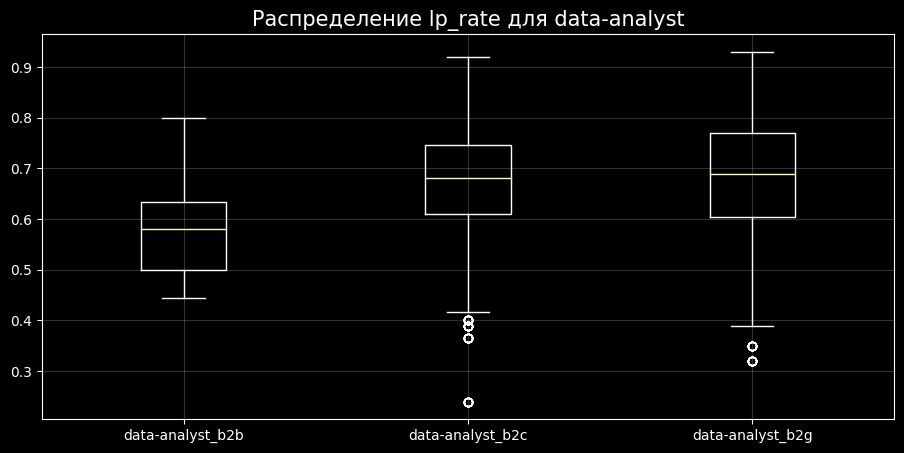

Медиана для b2b: 0.58
Медиана для b2b минус 1,5 IQR: 0.38


Медиана для b2c: 0.68
Медиана для b2c минус 1,5 IQR: 0.48


Медиана для b2g: 0.69
Медиана для b2g минус 1,5 IQR: 0.44


In [ ]:
boxplots('data-analyst', 'b2b', 'b2c', 'b2g')

*Студенты, пришедшие по b2g и b2c имеют похожее распределеие lp и имеют средний lp ввыше, чем у b2b, однако, в b2b значительно меньше выборка.*   
*LP менее 0.48/0.44 (значения > 75% перцентиль + 1.5 х МКР) для студентов DA можно считать аномальным*

Посмотрим кто из DA попал в список аномалий из сегмента b2c.

In [ ]:
t1 = pd.DataFrame(merged_df[(merged_df['profession_name'] == 'data-analyst') & \
                (merged_df['current_segment'] == 'b2c') & \
          (merged_df['lp_avg_user'].dropna() < np.percentile(merged_df['lp_avg_user'].dropna(), 0.48))] \
          [['user_id', 'current_cohort', 'current_segment', 'profession_name', 'lp_avg_user']]. \
          groupby(['user_id', 'current_cohort', 'current_segment', 'profession_name'])['lp_avg_user'].mean()).reset_index()
t1

,user_id,current_cohort,current_segment,profession_name,lp_avg_user
0,11732788,115,b2c,data-analyst,0.240
1,14364362,123,b2c,data-analyst,0.365
2,15064478,121,b2c,data-analyst,0.389


Аналогично посмотрим для b2g.

In [ ]:
t2 = pd.DataFrame(merged_df[(merged_df['profession_name'] == 'data-analyst') & \
                (merged_df['current_segment'] == 'b2g') & \
          (merged_df['lp_avg_user'].dropna() < np.percentile(merged_df['lp_avg_user'].dropna(), 0.44))] \
          [['user_id', 'current_cohort', 'current_segment', 'profession_name', 'lp_avg_user']]. \
          groupby(['user_id', 'current_cohort', 'current_segment', 'profession_name'])['lp_avg_user'].mean()).reset_index()
t2

,user_id,current_cohort,current_segment,profession_name,lp_avg_user
0,15001963,115,b2g,data-analyst,0.35
1,15393336,125,b2g,data-analyst,0.32


2) Для дата саентистов:

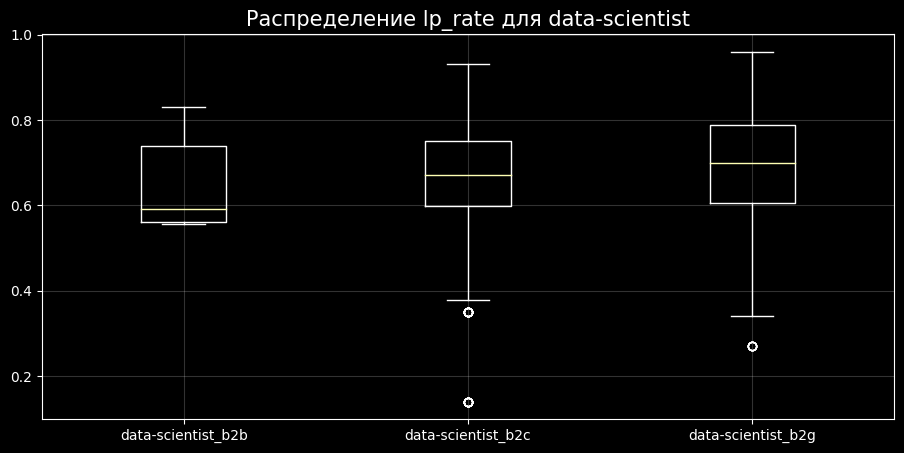

Медиана для b2b: 0.59
Медиана для b2b минус 1,5 IQR: 0.32


Медиана для b2c: 0.67
Медиана для b2c минус 1,5 IQR: 0.44


Медиана для b2g: 0.7
Медиана для b2g минус 1,5 IQR: 0.43


In [ ]:
boxplots('data-scientist', 'b2b', 'b2c', 'b2g')

*Студенты DS от b2c и b2g также имеют более высокий lp, чем b2b. Нижняя граница "усов" здесь ниже, что может говорить о более сложном материале. Аномалиями здесь можно считать lp менее 0.44/0.43.*

Посмотрим кто из DS попал в список аномалий из сегмента b2c.

In [ ]:
t3 = pd.DataFrame(merged_df[(merged_df['profession_name'] == 'data-scientist') & \
                (merged_df['current_segment'] == 'b2c') & \
          (merged_df['lp_avg_user'].dropna() < np.percentile(merged_df['lp_avg_user'].dropna(), 0.44))] \
          [['user_id', 'current_cohort', 'current_segment', 'profession_name', 'lp_avg_user']]. \
          groupby(['user_id', 'current_cohort', 'current_segment', 'profession_name'])['lp_avg_user'].mean()).reset_index()
t3

,user_id,current_cohort,current_segment,profession_name,lp_avg_user
0,5717886,97,b2c,data-scientist,0.377333
1,13838767,93,b2c,data-scientist,0.140000
2,14427477,103,b2c,data-scientist,0.350000


Аналогично посмотрим для b2g.

In [ ]:
t4 = pd.DataFrame(merged_df[(merged_df['profession_name'] == 'data-scientist') & \
                (merged_df['current_segment'] == 'b2g') & \
          (merged_df['lp_avg_user'].dropna() < np.percentile(merged_df['lp_avg_user'].dropna(), 0.43))] \
          [['user_id', 'current_cohort', 'current_segment', 'profession_name', 'lp_avg_user']]. \
          groupby(['user_id', 'current_cohort', 'current_segment', 'profession_name'])['lp_avg_user'].mean()).reset_index()
t4

,user_id,current_cohort,current_segment,profession_name,lp_avg_user
0,5054590,99,b2g,data-scientist,0.36
1,9003820,103,b2g,data-scientist,0.35
2,10315744,109,b2g,data-scientist,0.36
3,14759646,107,b2g,data-scientist,0.34
4,14990764,105,b2g,data-scientist,0.27


In [ ]:
abnormal_users_by_lp = pd.concat([t1, t2, t3, t4])

##### Вывод

Мы посмотрели на распределения среднего lp по наиболее популярным направлениям DA и DS,     
размах распределения lp студентов b2g больше, чем b2c по обеим профессиям,    
аномальных значений больше на направлении DS, также здесь более пологое распределение, что может означать более сложное обучение, чем на DA.

#### Анализ студентов, поменявших когорту

Посмотрим на процент студентов_профессий, поменявших когорту.

In [ ]:
merged_df['changed_cohort'] = [
    0 if x == y else 1 for x, y in zip(merged_df['cohort'], merged_df['current_cohort'])]

In [ ]:
changed_cohorts = merged_df[merged_df['changed_cohort'] == 1][
    ['user_id', 'profession_name', 'changed_cohort']]. \
    groupby(['user_id', 'profession_name']).nunique().reset_index()

all_students = merged_df[['user_id', 'profession_name', 'changed_cohort']]. \
    groupby(['user_id', 'profession_name']).nunique().reset_index()

print(round(len(changed_cohorts) / len(all_students) * 100,2))

6.32


*Около 6% меняют когорту.*

Посмотрим в разрезе профессии.

In [ ]:
changed_cohorts.groupby('profession_name')['user_id'].count().sort_values(ascending=False)

profession_name
data-analyst         159
data-scientist        51
data-analyst-plus      7
systems-analyst        6
sql-data-analyst       2
Name: user_id, dtype: int64

In [ ]:
t = all_students.groupby('profession_name')['user_id'].count().sort_values(ascending=False).reset_index(). \
    merge(changed_cohorts.groupby('profession_name')['user_id'].count().sort_values(ascending=False). \
          reset_index(), on='profession_name', how='left').fillna(0)
t.columns = ['profession_name','users_total','users_cohort_change']
t['changed_cohort_share'] = t['users_cohort_change'] / t['users_total']
t

,profession_name,users_total,users_cohort_change,changed_cohort_share
0,data-analyst,1523,159.0,0.104399
1,data-scientist,1183,51.0,0.043111
2,systems-analyst,313,6.0,0.019169
3,data-analyst-plus,191,7.0,0.036649
4,sql-data-analyst,155,2.0,0.012903
5,data-scientist-plus,110,0.0,0.000000
6,datavis-and-bi-tools,32,0.0,0.000000
7,data-analyst-bootcamp,18,0.0,0.000000
8,data-engineer,14,0.0,0.000000
9,math-for-da-ds,11,0.0,0.000000


*Студенты по направлению DA склонны к смене когорты чаще.*

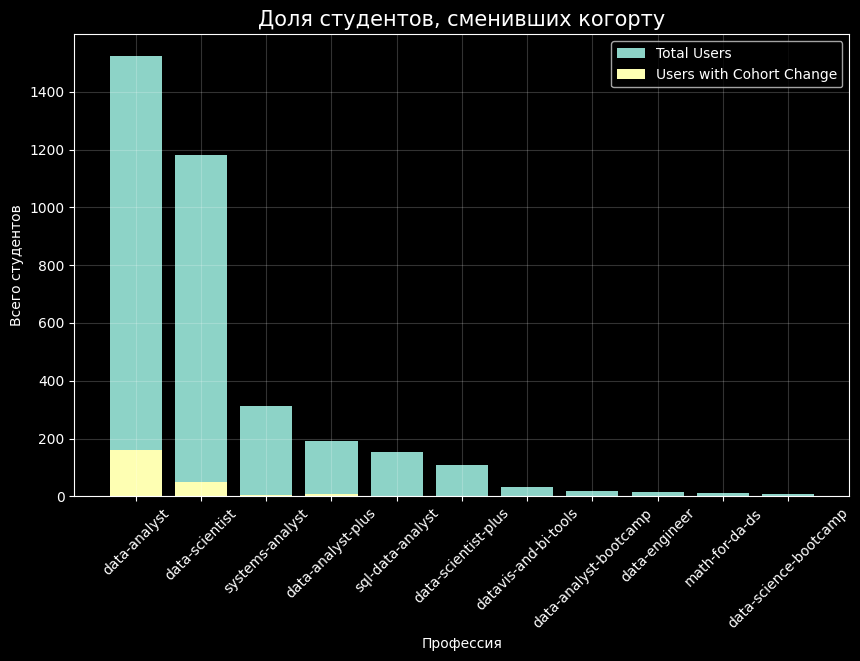

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(t['profession_name'], t['users_total'], label='Total Users')
plt.bar(t['profession_name'], t['users_cohort_change'], label='Users with Cohort Change')
plt.xticks(rotation=45)

plt.xlabel('Профессия')
plt.ylabel('Всего студентов')
plt.title('Доля студентов, сменивших когорту')
plt.legend()

plt.show()

##### Вывод

Всего около 6% студентов в процессе меняют когорту, 10% из них с курса DA - больше всего.

#### Гипотеза о том, что lp растет со временем (увеличением номера когорты)

Проверим гипотезу о том, что с lp растет со временем, что может косвенно указывать на улучшение материала программ курсов. Для этого посмотрим на динамику скользящего среднего lp во времени (по возрастанию номеров когорт) по каждому курсу.

In [ ]:
# расчитаем скользящее среднее
t = merged_df.groupby(['current_cohort', 'profession_name'])['lp_avg_user'].mean().round(3).dropna().reset_index()
t['rnk'] = t.groupby('profession_name')['current_cohort'].rank(method='dense')
t['cumsum'] = t.groupby('profession_name')['lp_avg_user'].cumsum()
t['lp_moving_avg'] = t['cumsum'] / t['rnk']

In [ ]:
# посмотрим на количество и долю студентов и когорт
tt = merged_df.groupby('profession_name')['current_cohort', 'user_id'].nunique()
tt['user_share'] = tt['user_id'] / tt['user_id'].sum()
tt.sort_values('user_share', ascending=False)

,current_cohort,user_id,user_share
profession_name,,,
data-analyst,30,1523,0.427929
data-scientist,31,1183,0.332397
systems-analyst,7,313,0.087946
data-analyst-plus,9,191,0.053667
sql-data-analyst,70,155,0.043552
data-scientist-plus,9,110,0.030908
datavis-and-bi-tools,2,32,0.008991
data-analyst-bootcamp,3,18,0.005058
data-engineer,4,14,0.003934


In [ ]:
# отбросим малочисленные направления
tt = tt.query('user_share > 0.01').reset_index()
tt

,profession_name,current_cohort,user_id,user_share
0,data-analyst,30,1523,0.427929
1,data-analyst-plus,9,191,0.053667
2,data-scientist,31,1183,0.332397
3,data-scientist-plus,9,110,0.030908
4,sql-data-analyst,70,155,0.043552
5,systems-analyst,7,313,0.087946


In [ ]:
fig = px.line(t.query('profession_name.isin(@tt.profession_name)'), x='rnk', y='lp_moving_avg', color='profession_name',
              custom_data=['profession_name', 'current_cohort', 'lp_moving_avg'])
fig.update_layout(title='Распределение lp по возрастанию номера когорты',
                  xaxis_title='ранг, соответствующий номеру когорты, отсортированному по возрастанию',
                  yaxis_title='скользящее среднее lp')
fig.update_traces(hovertemplate=
                  'Profession: %{customdata[0]}<br>Current cohort: %{customdata[1]}<br>avg_lp: %{customdata[2]}<br>')
fig.show()

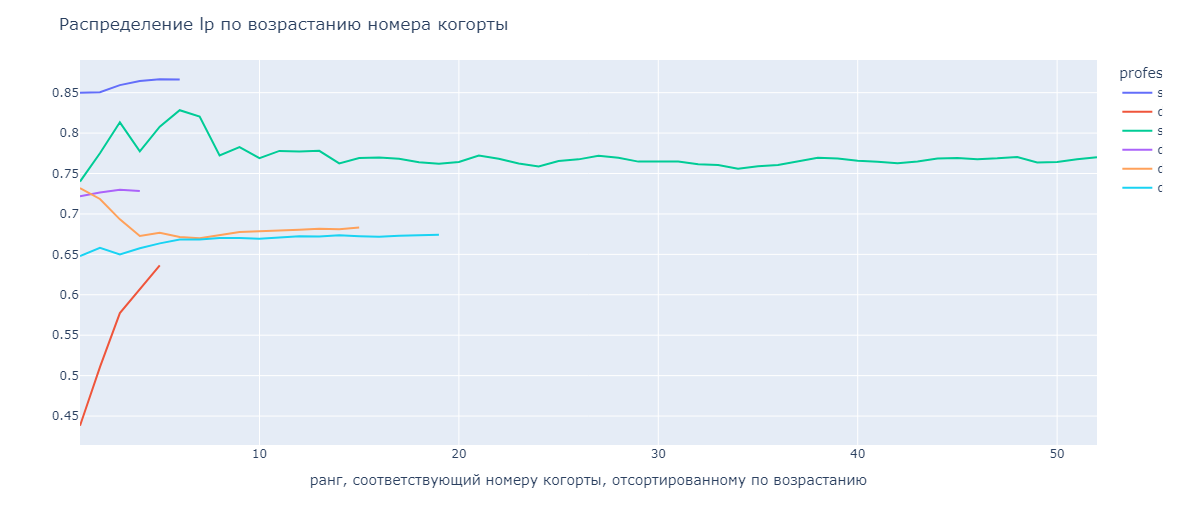

Посмотрим сколько всего когорт по каждой специальности.

In [ ]:
t.groupby('profession_name')['current_cohort'].count().sort_values(ascending=False)

profession_name
sql-data-analyst         52
data-analyst             19
data-scientist           15
systems-analyst           6
data-scientist-plus       5
data-analyst-plus         4
data-engineer             4
math-for-da-ds            4
data-analyst-bootcamp     2
data-science-bootcamp     2
Name: current_cohort, dtype: int64

##### Вывод

Больше всего на карьерном треке когорт с направления SQL-DA, однако на этом курсе всего 154 человека, т.е. примерно по 2 человека на когорту.   
Среднее скользящее lp по направлению DA имеет тенденцию к слабому росту. Аналогично по DS начиная с 93 когорты.   
Больше всего растет lp по направлению DS+.     
По направлению SA самый высокий и примерно одинаковый уровень lp в динамике когорт.


#### Кластеризация по ответам в поле для свободных комментариев

Посчитаем долю людей, заполнивших поле с дополнительными комментариями.

In [ ]:
round(merged_df.query('question_type == "text"')[
    'user_id'].nunique() / merged_df['user_id'].nunique() * 100,2)

98.03

*Почти все заполнили это поле.*

Сначала определим словари по ключевым словам и далее попробуем кластеризовать с помощью алгоритма KMeans.

In [ ]:
# возьмем только строковые значения
text_processing = merged_df[
    merged_df['question_title'] == 'Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.']
text_processing = text_processing[text_processing['user_answer'].apply(lambda x: isinstance(x, str))]

In [ ]:
# для начала определим основные кластеры по ключевым словам
pattern = r'^[^a-zA-Zа-яА-Я]*$'
text_processing['answer_processed'] = ['нет комментариев' if re.match(pattern, x) or pd.isna(x) or \
    bool(len(x) < 8) or \
    any(substring in x.lower() for substring \
    in ['нет доп. комментариев', 'нет комментариев', 'комментариев нет', 'comment', \
        'ничего сказать не могу', 'нету комментариев', 'без комментариев', \
        'нет комментария', 'нечего сказать', 'комментариев пока нет', 'комментария нет', \
        'нет вопросов']) \
        else('работаю' if any(substring in x.lower() for substring \
        in ['работаю', 'работа есть', 'есть работа', \
        'продолжаю работать', 'трудоустроен', 'не планирую менять работу',\
        'текущая работа устраивает']) \
            else('не ищу работу' if any(substring in x.lower() for substring \
                in ['не ищу', 'не искал', 'не искала', 'пока не искал', 'пока не искала', \
                'поиском работы еще не занимался', 'еще не пытался найти работу', \
                'буду искать работу после', 'не занимаюсь поиском']) \
                else ('в поиске работы' if any(substring in x.lower() for substring \
                in ['ищу', 'в поиске', 'заняться активным поиском', 'смотрю предложения', \
                'в активном поиске', 'приступила к поиску', 'приступил к поиску']) \
                    else('не нашел работу' if any(substring in x.lower() for substring \
                    in ['не нашел работу', 'не нашла работу', 'не берут без опыта']) \
                        else('нашел работу' if any(substring in x.lower() for substring \
                        in ['нашел работу', 'нашла работу', 'нашел', 'нашла', 'не получается найти', \
                        'все нашлось']) \
                            else('позитивное впечатление от курса' if any(substring in x.lower() for substring \
                            in ['все окей', 'все хорошо', 'все отлично', 'все отличное', 'все понятно', \
                            'все супер', 'спасибо', 'чувствую себя неуверенно', 'обучение качественное']) \
                                else('есть сомнения в образовании/своих силах' if any(substring in x.lower() for substring \
                                in ['плохо', 'плохое', 'плохой', 'низкое', \
                                    'недостаточно', 'некомпетентные', 'неудобный', 'неудобно',\
                                    'не хватает', 'дорого', 'дорогое' \
                                    'некачественный', 'не чувствую себя готовым', \
                                    'не уверена', 'не уверен', 'нужно еще проходить и переучиваться', \
                                    'неуверенность', 'невозможно', 'сложно', 'не знаю как составить', \
                                    'безрезультатно', 'недостаток', 'нужна помощь', 'необходима помощь', \
                                    'панические вопли', 'я боюсь', 'работы очень тяжело', 'сложно', \
                                    'никто не откликнулся', 'нет достаточных знаний', 'не звали на собесы', \
                                    'отсеивают по резюме'
        ]) else x) \
    )))))) for x in text_processing['user_answer']]

In [ ]:
# остальные комментарии запишем в переменную to_process
to_process = text_processing[~text_processing['answer_processed'].isin(
    ['нет комментариев', 'работаю', 'не ищу работу', 'в поиске работы', \
     'не нашел работу', 'нашел работу', 'впечатление от курса', \
     'есть сомнения в образовании/своих силах'])]['answer_processed']

In [ ]:
# создадим функцию для фильтрации текста от лишних слов
bad_words = '[^0-9a-zA-Zа-яА-Я ]+'
morph = MorphAnalyzer()
def token_only(text):
    text = re.sub(bad_words,'-',text)
    tokens = [word.lower() for sent in sent_tokenize(text) for word in word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        token = token.strip()
        token = morph.normal_forms(token)[0]
        filtered_tokens.append(token)
    return filtered_tokens

In [ ]:
# следующим этапом "чистим" текст, лемматизируем и создаем матрицу tfidf, которую потом передадим алгоритму kmeans
stops = stopwords.words('russian')
tfidf_vectorizer = TfidfVectorizer(smooth_idf=True,max_df=0.6,min_df=0.01,max_features=100000,
                                   stop_words=stops,
                                   use_idf=True,tokenizer=token_only, ngram_range=(1,3))
tfidf_matrix = tfidf_vectorizer.fit_transform(to_process)

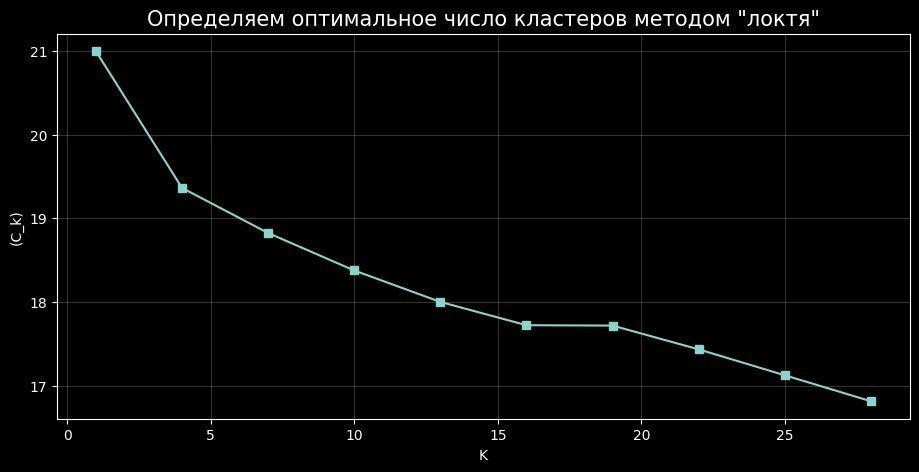

In [ ]:
# методом "локтя" определяем оптимальное число кластеров.
inertia = []
for k in range(1,30,3):
    km = KMeans(n_clusters=k,init='random', random_state=42).fit(tfidf_matrix)
    inertia.append(np.sqrt(km.inertia_))
plt.plot(range(1,30,3),inertia,marker='s')
plt.xlabel('K')
plt.ylabel('(C_k)')
plt.title('Определяем оптимальное число кластеров методом "локтя"')
plt.show()

*Пологий график означает, что алгоритму сложно найти очевидную разницу. В этом случае оптимальное количество кластеров будет близко к количеству значений. Для решения такой задача нужно использовать более сложные алгоритмы кластеризации. Поэтому мы остановимся на кластеризации, выполненной по ключевым словам.*

Посмотрим сколько студентов остались без кластера.

In [ ]:
round(text_processing[~text_processing['answer_processed'].isin(
    ['нет комментариев', 'работаю', 'не ищу работу', 'в поиске работы', \
     'не нашел работу', 'нашел работу', 'впечатление от курса', \
     'есть сомнения в образовании/своих силах'])]['user_id'].nunique() / \
     text_processing['user_id'].nunique(),2)

0.14

*Осталось 14% нераспределенных студентов.*

Посмотрим на размеры получившихся кластеров.

In [ ]:
t = text_processing.groupby('answer_processed')['answer_id'].nunique().sort_values(
    ascending=False).reset_index()
t['share'] = t['answer_id'] / t['answer_id'].sum()
tt = t.query('share > 0.01').sort_values('share', ascending=False)
tt

,answer_processed,answer_id,share
0,нет комментариев,2611,0.750935
1,работаю,119,0.034225
2,нашел работу,88,0.025309
3,не ищу работу,77,0.022146
4,позитивное впечатление от курса,49,0.014093
5,в поиске работы,48,0.013805
6,есть сомнения в образовании/своих силах,37,0.010641


*Большинство студентов не оставляют значимых для анализа комментариев. 196 человек уже трудоустроено/не планирует менять работу и не ищут. 134 человека либо ищут, либо уже нашли работу на момент окончания карьерного трека.*

Визуализируем результат.

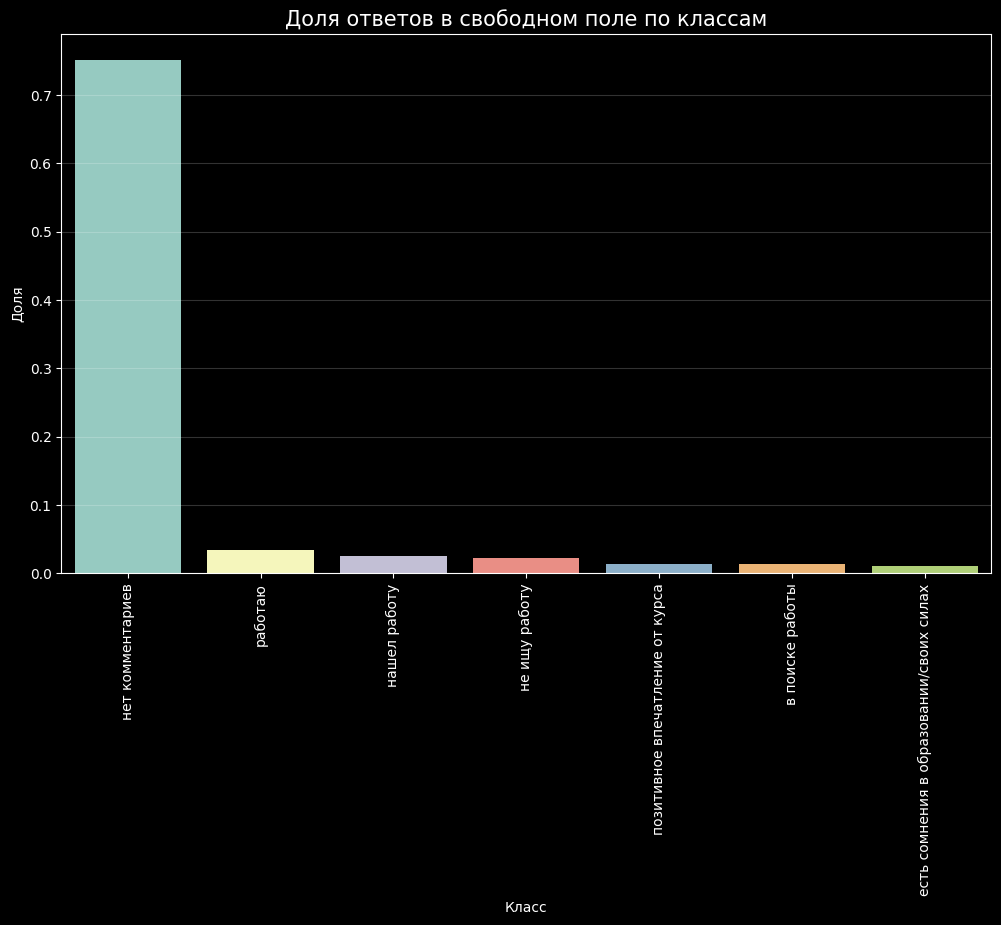

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(tt, x='answer_processed', y='share')
plt.title('Доля ответов в свободном поле по классам')
plt.xlabel('Класс')
plt.ylabel('Доля')
plt.xticks(rotation = 90)
plt.show()

##### Вывод

Мы кластеризовали ответы студентов по ключевым словам. В результате чего, мы выяснили, что большинство не оставляет комментариев, которые можно как-то проанализировать.

#### Проверим гипотезу о том, что студенты, ищущие работу и/или нашедшие ее, имеют более высокий lp, чем те, кто не нашел и/или не ищет.

In [ ]:
text_processing['in_active_search_of_work'] = [1 if x == 'нашел работу' or x == 'в поиске работы' else(
    0 if x == 'не нашел работу' or x == 'не ищу работу' or x == 'работаю' else '-') \
    for x in text_processing['answer_processed']]

In [ ]:
t = text_processing.query('in_active_search_of_work != "-"')
t = pd.pivot_table(t, 
               columns='in_active_search_of_work',
               index='profession_name',
               values='lp_avg_user',
               aggfunc=['count','mean']).fillna(0).reset_index()
t.columns = ['profession_name', 'count_passive_students', 'count_active_students', \
              'avg_lp_passive_students', 'avg_lp_active_students']
t

,profession_name,count_passive_students,count_active_students,avg_lp_passive_students,avg_lp_active_students
0,data-analyst,72.0,58.0,0.680497,0.671389
1,data-analyst-bootcamp,0.0,1.0,0.000000,0.850000
2,data-analyst-plus,9.0,7.0,0.750608,0.669201
3,data-engineer,2.0,1.0,0.780000,0.798333
4,data-scientist,55.0,41.0,0.704332,0.674740
5,data-scientist-plus,2.0,2.0,0.711500,0.864500
6,datavis-and-bi-tools,0.0,0.0,0.000000,0.000000
7,math-for-da-ds,0.0,0.0,0.000000,0.000000
8,sql-data-analyst,3.0,3.0,0.838889,0.688333
9,systems-analyst,32.0,12.0,0.867046,0.854053


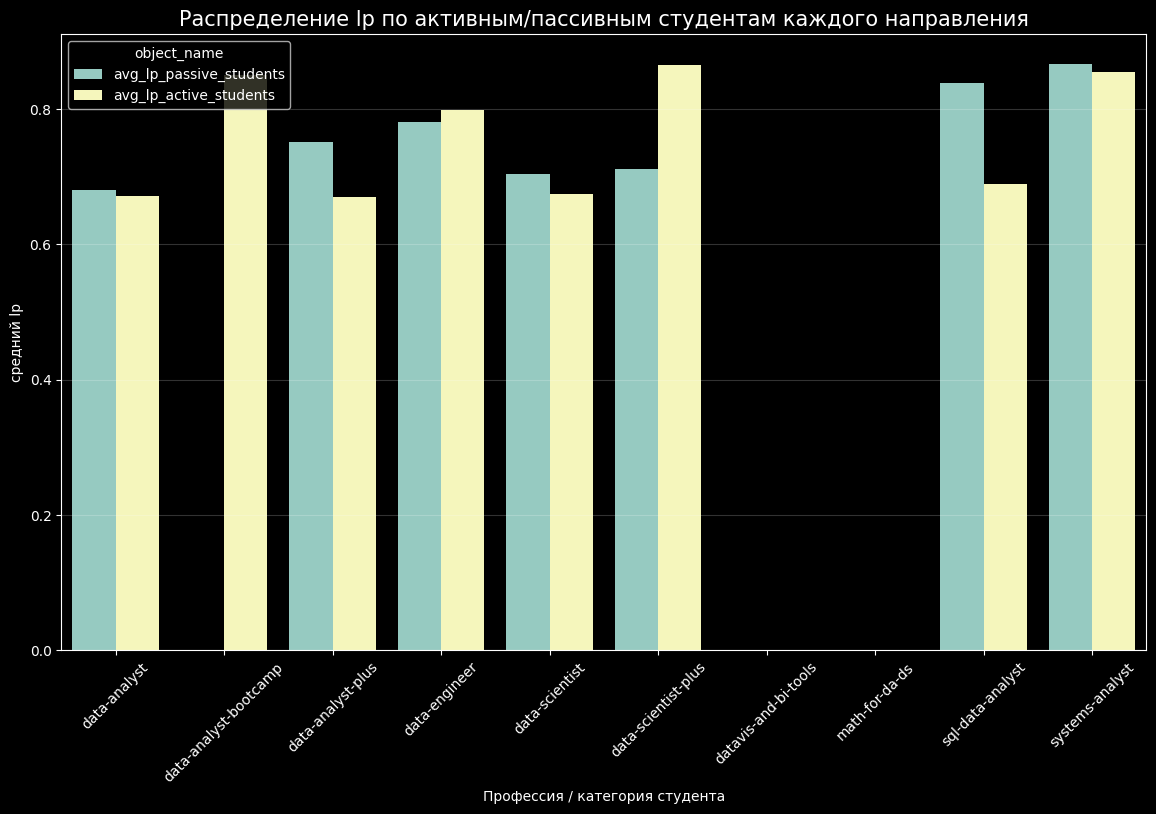

In [ ]:
tt = t[['profession_name','avg_lp_passive_students','avg_lp_active_students']]
tt = tt.melt(id_vars=['profession_name'], var_name='object_name', value_name='avg_lp')

plt.figure(figsize=(14,8))
sns.barplot(data=tt, x='profession_name', y='avg_lp', hue='object_name')
plt.xticks(rotation=45)
plt.title('Распределение lp по активным/пассивным студентам каждого направления')
plt.xlabel('Профессия / категория студента')
plt.ylabel('средний lp')
plt.show()

*Явной зависимости активности студента после выпуска и lp нет, на наиболее популрных направлениях DA и DS пассивные студенты показывают даже лучший показатель lp. Аналогично и на 3м по пулярности направлении SA.*

Теперь посмотрим на тех, кто в комментариях выражал неуверенность в своих силах или качестве курсов.

In [ ]:
(text_processing.query('answer_processed == "есть сомнения в образовании/своих силах"'). \
    groupby('user_id')['profession_name'].nunique() > 1).nunique()

1

*Данные студенты учились на курсах только по одной профессии.*

In [ ]:
text_processing.query('answer_processed == "есть сомнения в образовании/своих силах"') \
    ['user_id'].nunique()

37

*Всего 37 человек.*

Посмотрим на распределение по профессиям.

In [ ]:
text_processing.query('answer_processed == "есть сомнения в образовании/своих силах"'). \
    groupby(['current_segment','profession_name']).agg({'user_id':'nunique','lp_avg_user':'mean'}). \
    fillna(0).sort_values(['user_id', 'lp_avg_user'],ascending=False).reset_index()

,current_segment,profession_name,user_id,lp_avg_user
0,b2g,data-analyst,14,0.665779
1,b2c,data-analyst,7,0.581936
2,b2c,data-scientist,6,0.750667
3,b2g,data-scientist,3,0.682051
4,b2c,datavis-and-bi-tools,2,0.000000
5,b2c,systems-analyst,1,0.866364
6,b2g,data-analyst-plus,1,0.762500
7,b2c,data-analyst-plus,1,0.761429
8,b2c,math-for-da-ds,1,0.620000
9,b2c,data-scientist-plus,1,0.000000


*Больше всего неуверенных в своих силах студентов DA из b2g и b2c.*   
*Средний уровень lp сильно разнится, из этого можно сделать вывод, что средний lp здесь не определяющий фактор.*

Посмотрим как эти люди отвечали на остальные вопросы после трека трудоустройства.

In [ ]:
t = merged_df[merged_df['user_id'].isin(text_processing.query(
    'answer_processed == "есть сомнения в образовании/своих силах"')['user_id'])]

for qt in t[t['question_title'] != 'Тут вы можете оставить свой комментарий, если не нашли подходящего варианта ответа.'] \
    ['question_title'].unique():
        print(t[t['question_title'] == qt].groupby('user_answer')['user_id'].nunique().\
            sort_values(ascending=False))
        print('\n')

user_answer
Сменить работу.                                    26
Получить новые знания, чтобы повысить зарплату.     6
Получить новые навыки для общего развития.          2
Продвинуться по карьерной лестнице.                 2
Развить свой бизнес.                                1
Name: user_id, dtype: int64


user_answer
Нет                  28
В активном поиске     8
Да                    1
Name: user_id, dtype: int64


user_answer
прохождение собеседований                      31
оценка шансов на трудоустройство               27
резюме                                         27
оформление портфолио                           26
решение тестовых заданий                       26
персональная карьерная консультация            25
сопроводительное письмо                        24
как и куда можно расти как специалисту         23
определение стратегии поиска работы            23
устройство рынка труда                         23
определение профессиональной сферы             21
как говорить

*Данные студенты в основном приходят учиться для смены профессии без бэкграунда в аналитике и IT.*

##### Вывод

Мы сравнили студентов, оставивших в текстовом поле вопроса комментарий о либо факте трудоустройста/поиске работы, либо о негативном опыте поиска работы/нежеланием менять текущую работу. Таким образом, поделив студентов на 2 категории, мы выяснили, что явного отличия среднего lp между ними нет. Среди тех, кто не может/не хочет большинство представляют b2g сегмент направления DA, они пришли сменить работу и не имеют никакого опыта.

#### Попробуем найти отличие между категориями студентов, нашедших работу в процессе обучения и нет

In [ ]:
# проставим для каждого студента 1 или 0 в зависимости от факта нахождения работы в период обучения
merged_df['found_work_'] = [1 if x == 'Да' else 0 for x in merged_df['user_answer']]
t = merged_df[merged_df['found_work_'] == 1]['user_id'].unique()
merged_df['found_work'] = [1 if x in t else 0 for x in merged_df['user_id']]
merged_df.drop('found_work_', axis=1, inplace=True)

In [ ]:
# применим one-hot encoding для преобразования категориальных переменных в численные, строим матрицу
df_encoded = pd.get_dummies(merged_df[merged_df['question_type'] != 'text'],
                            columns=['current_segment',
                                     'user_answer',
                                     'profession_name'])
corr_matrix = df_encoded.corr()

In [ ]:
# удаляем ненужные строки и колонки
corr_matrix.drop(['user_id', 'cohort', 'current_cohort', 'changed_cohort', \
                  'user_answer_В активном поиске', 'user_answer_Да', \
                  'user_answer_Нет'], axis=0, inplace=True)
corr_matrix.drop(['user_id', 'cohort', 'current_cohort', 'changed_cohort', \
                  'user_answer_В активном поиске', 'user_answer_Да', \
                  'user_answer_Нет'], axis=1, inplace=True)

In [ ]:
# меняем местами последовательность строк и столбцов так, чтобы целевая метрика была 1
corr_matrix = corr_matrix.iloc[[1, 0] + list(range(2, len(corr_matrix))), 
                               [1, 0] + list(range(2, len(corr_matrix.columns)))]

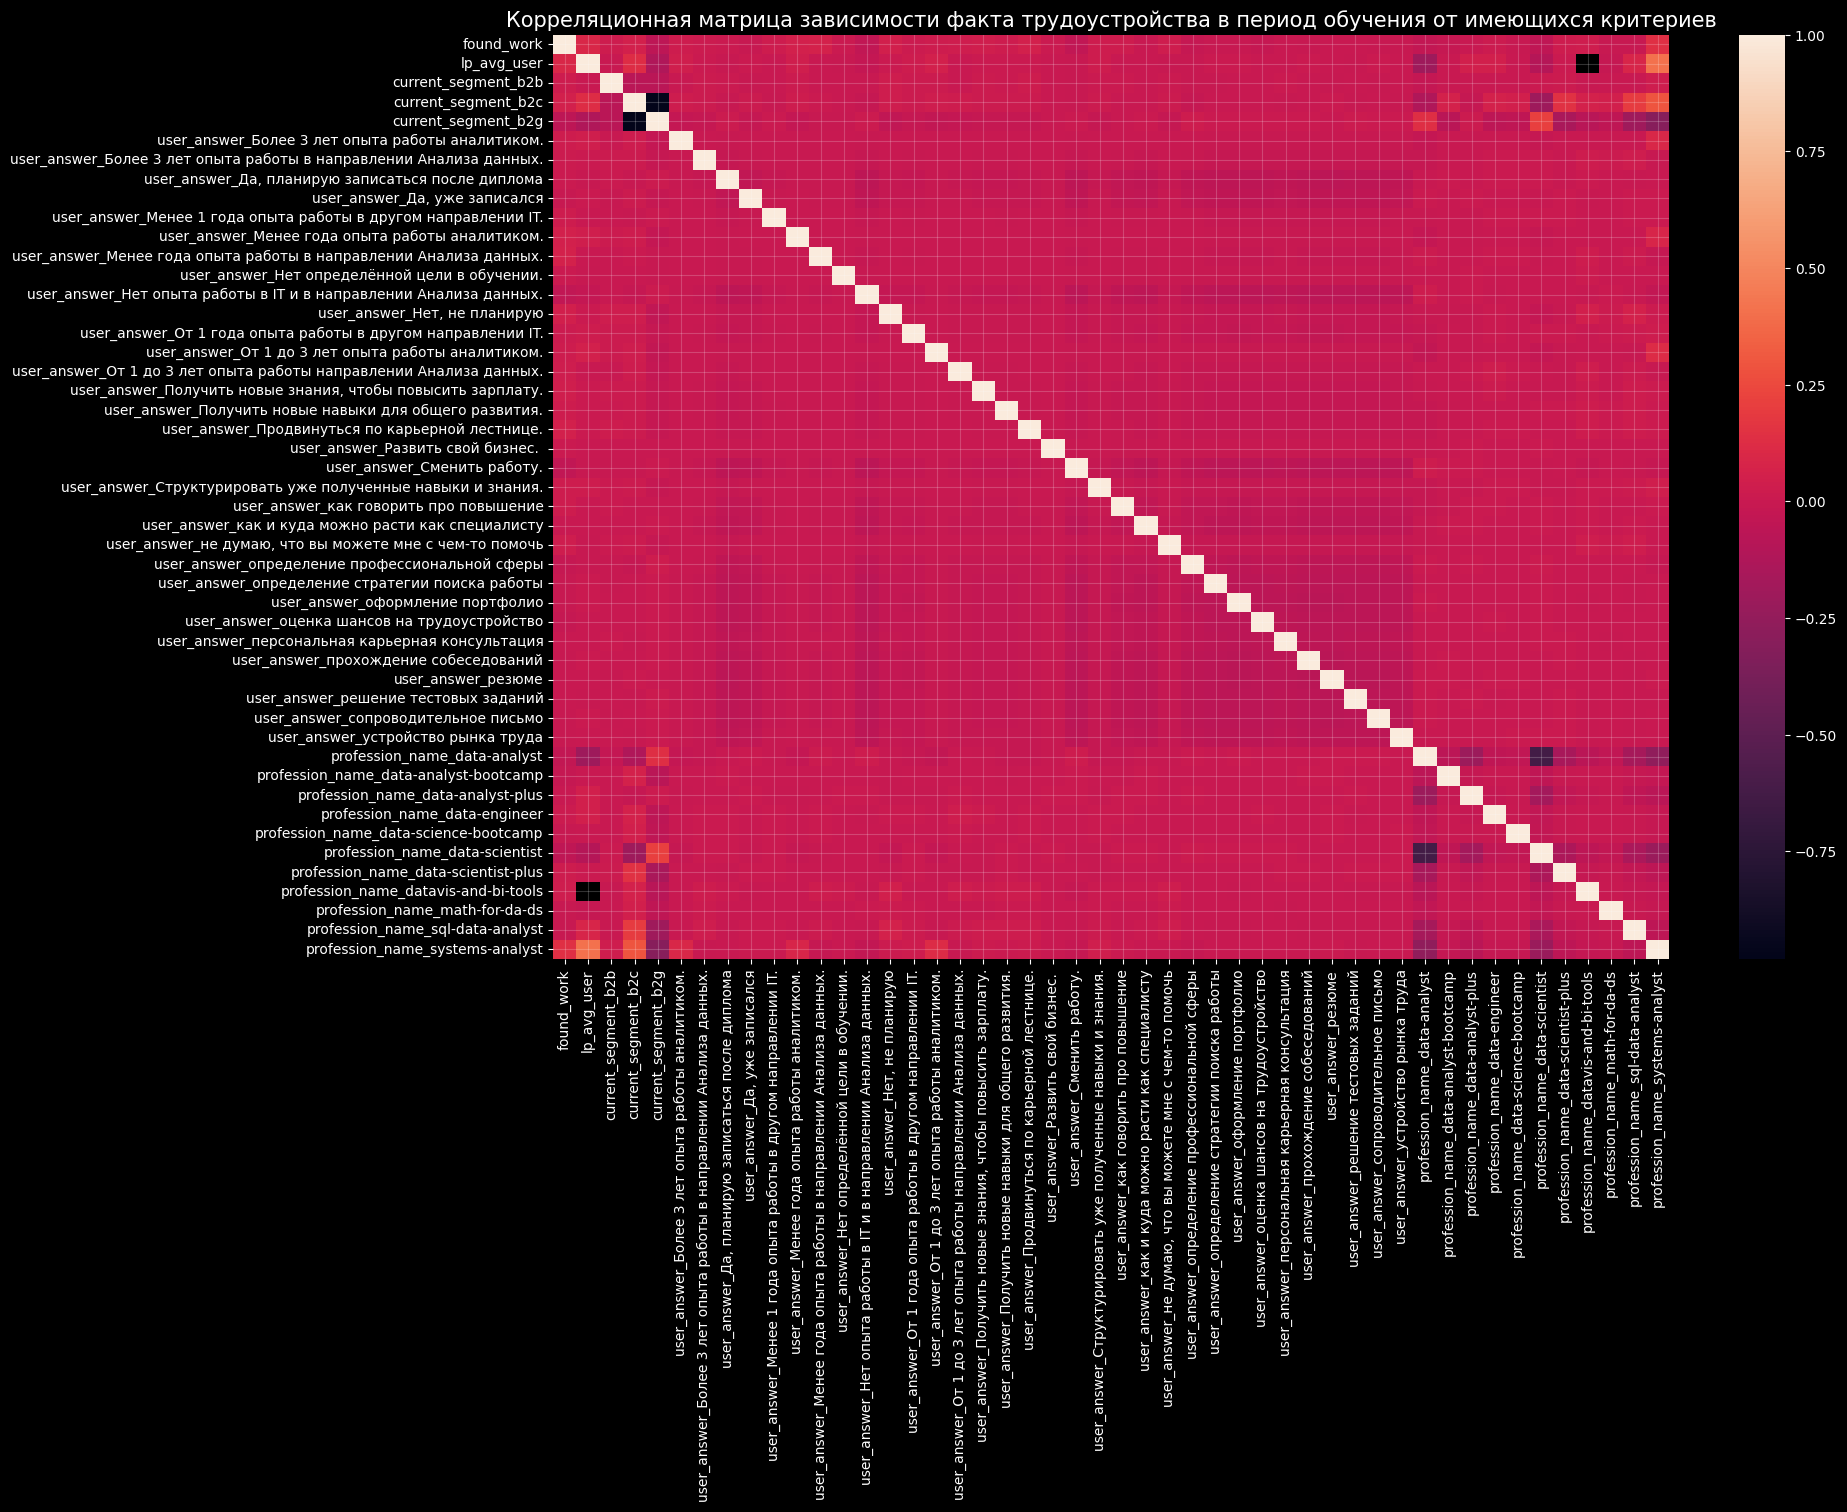

In [ ]:
# рисуем матрицу на хитмэпе
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix)
plt.xticks(rotation=90)
plt.title('Корреляционная матрица зависимости факта трудоустройства в период обучения от имеющихся критериев')
plt.show()

In [ ]:
corr_matrix.iloc[0,0:].sort_values(ascending=False)

found_work                                                            1.000000
profession_name_systems-analyst                                       0.136334
lp_avg_user                                                           0.088894
user_answer_Менее года опыта работы в направлении Анализа данных.     0.063252
user_answer_Менее года опыта работы аналитиком.                       0.055702
user_answer_Продвинуться по карьерной лестнице.                       0.053296
current_segment_b2c                                                   0.051365
user_answer_Нет, не планирую                                          0.048073
user_answer_Получить новые знания, чтобы повысить зарплату.           0.038684
user_answer_От 1 до 3 лет опыта работы направлении Анализа данных.    0.029302
profession_name_datavis-and-bi-tools                                  0.028328
user_answer_не думаю, что вы можете мне с чем-то помочь               0.026746
user_answer_Получить новые навыки для общего развити

*Сильной корреляции между фактом трудоустройства в период обучения. Есть слабая корреляция между фактом обучения на SA и lp rate.*   
*Факт обучения на SA имеет слабую корреляцию с lp.*

Посмотрим с каким опытом приходят на курс SA.

In [ ]:
t = merged_df[(merged_df['profession_name'] == 'systems-analyst') & \
          (merged_df['question_title'] == 
           'В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.')]. \
           groupby('user_answer')['user_id'].nunique().sort_values(ascending=False).reset_index()

t['total'] = t['user_id'].sum()
t['share'] = t['user_id'] / t['total']
t.sort_values('share', ascending=False)

,user_answer,user_id,total,share
0,Нет опыта работы в IT и в направлении Анализа ...,113,313,0.361022
1,От 1 года опыта работы в другом направлении IT.,69,313,0.220447
2,От 1 до 3 лет опыта работы аналитиком.,48,313,0.153355
3,Более 3 лет опыта работы аналитиком.,28,313,0.089457
4,Менее года опыта работы аналитиком.,27,313,0.086262
5,Менее 1 года опыта работы в другом направлении...,17,313,0.054313
6,От 1 до 3 лет опыта работы направлении Анализа...,6,313,0.019169
7,Более 3 лет опыта работы в направлении Анализа...,5,313,0.015974


*На курсы SA только 36% приходят без опыта в аналитике и IT, что может быть причиной лучшего lp студентов. Для сравнения посмотрим на DA.*

In [ ]:
t = merged_df[(merged_df['profession_name'] == 'data-analyst') & \
          (merged_df['question_title'] == 
           'В зависимости от опыта работы вам может понадобиться разный вид консультаций и помощи от команды сопровождения и трудоустройства. Для нас очень важен честный ответ и понимание вашего бэкграунда.')]. \
           groupby('user_answer')['user_id'].nunique().sort_values(ascending=False).reset_index()

t['total'] = t['user_id'].sum()
t['share'] = t['user_id'] / t['total']
t.sort_values('share', ascending=False)

,user_answer,user_id,total,share
0,Нет опыта работы в IT и в направлении Анализа ...,1120,1523,0.735391
1,От 1 года опыта работы в другом направлении IT.,170,1523,0.111622
2,Менее года опыта работы в направлении Анализа ...,70,1523,0.045962
3,От 1 до 3 лет опыта работы направлении Анализа...,70,1523,0.045962
4,Менее 1 года опыта работы в другом направлении...,48,1523,0.031517
5,Более 3 лет опыта работы в направлении Анализа...,45,1523,0.029547


*В случае с DA более 73% приходят без опыта в аналитике и IT.*   


##### Вывод

Мы обнаружили наличие слабой коррелярции между студентами SA и фактом получения работы до начала карьерного трека, есть слабая корреляция между получением работы и lp. Это возможно связано с тем, что на курсы SA приходят более подготовленные студенты, имевшие опыт в аналитике или в IT.

#### Анализ B2B сегмента, как точки для роста.

- Из проведенного нами анализа, отчетливо видно, что b2b сегмент является самым малочисленным из всех представленных. Поэтому решили рассмотреть данный сегмент более детально для составления портретов студентов. Возможно портреты студентов дадут подсказки по точкам роста для данного сегмента.

In [ ]:
df_b2b = merged_df.query('current_segment == "b2b"') # Люди только из Б2Б сегмента

In [ ]:
df_b2b_vopr = df_b2b.groupby(['question_title','user_answer']).agg({'user_id':'count', 'lp_avg_user':'mean'})
df_b2b_vopr # смотрим как люди из Б2Б отвечают на вопросы

user_id  \
question_title                                     user_answer                                                   
Бывает, что во время обучения меняется его цель... Получить новые знания, чтобы повысить зарплату.           5   
                                                   Получить новые навыки для общего развития.                3   
                                                   Продвинуться по карьерной лестнице.                       6   
                                                   Сменить работу.                                           8   
                                                   Структурировать уже полученные навыки и знания.           2   
В зависимости от опыта работы вам может понадоб... Более 3 лет опыта работы в направлении Анализа ...        3   
                                                   Менее года опыта работы аналитиком.                       1   
                                                   Менее года опыта работы в направлении Анализа д...        1   
                                                   Нет опыта работы в IT и в направлении Анализа д...       10   
                                                   От 1 года опыта работы в другом направлении IT.           7   
                                                   От 1 до 3 лет опыта работы аналитиком.                    2   
                                                   От 1 до 3 лет опыта работы направлении Анализа ...        1   
Возможно вы нашли работу за время обучения?        В активном поиске                                         1   
                                                   Да                                                        2   
                                                   Нет                                                      20   
Для программы важно понять над чем вам нужно по... как говорить про повышение                                9   
                                                   как и куда можно расти как специалисту                   10   
                                                   не думаю, что вы можете мне с чем-то помочь               2   
                                                   определение профессиональной сферы                        5   
                                                   определение стратегии поиска работы                       8   
                                                   оформление портфолио                                     12   
                                                   оценка шансов на трудоустройство                         12   
                                                   персональная карьерная консультация                      12   
                                                   прохождение собеседований                                11   
                                                   резюме                                                    9   
                                                   решение тестовых заданий                                  9   
                                                   сопроводительное письмо                                   5   
                                                   устройство рынка труда                                   10   
Планируете ли вы записаться на Карьерный Трек?     Да, планирую записаться после диплома                    13   
                                                   Да, уже записался                                         3   
                                                   Нет, не планирую                                          8   
Тут вы можете оставить свой комментарий, если н...                                                           3   
                                                   *                                                         1   
                                                   +                                                         1   

- Стоит отметить,что среди данных студентов нет людей, которые пришли с целью "развить собственный бизнес" и "без определенной цели обучения", что логично, так как эти люди пришли учится от своего работодателя.

In [ ]:
def b2b (answer):
    rab = df_b2b.query('question_title == "Бывает, что во время обучения меняется его цель. Например, изначально вы не планировали менять работу, но влюбились в профессию. Может, произошли жизненные изменения или вам сложно определить цель. Чтобы мы поняли, как помочь, отметьте подходящее утверждение:" & user_answer == @answer')
    list_rab = rab['user_id'].tolist()
    df_b2b_rab_cor = df_b2b.query('user_id == @list_rab')
    df_new = df_b2b_rab_cor.groupby(['question_title','user_answer']).agg({'user_id':'count',
                                                                           'lp_avg_user':'mean'})
    return df_new
# пишу функцию которая работает принимает нужный нам ответ о цели обучения.
# далее собирает ID пользователей с этой целью обучения
# фильтрует из общей таблицы ID этих пользователй и группирует их ответы по остальным вопросам.
# дополнительно выводит среднее значение LP 

In [ ]:
# хотят сменить работу
b2b ('Сменить работу.')

user_id  \
question_title                                     user_answer                                                   
Бывает, что во время обучения меняется его цель... Сменить работу.                                           8   
В зависимости от опыта работы вам может понадоб... Менее года опыта работы в направлении Анализа д...        1   
                                                   Нет опыта работы в IT и в направлении Анализа д...        6   
                                                   От 1 года опыта работы в другом направлении IT.           1   
Возможно вы нашли работу за время обучения?        В активном поиске                                         1   
                                                   Нет                                                       7   
Для программы важно понять над чем вам нужно по... как говорить про повышение                                2   
                                                   как и куда можно расти как специалисту                    4   
                                                   не думаю, что вы можете мне с чем-то помочь               1   
                                                   определение профессиональной сферы                        2   
                                                   определение стратегии поиска работы                       4   
                                                   оформление портфолио                                      7   
                                                   оценка шансов на трудоустройство                          5   
                                                   персональная карьерная консультация                       4   
                                                   прохождение собеседований                                 5   
                                                   резюме                                                    5   
                                                   решение тестовых заданий                                  3   
                                                   сопроводительное письмо                                   3   
                                                   устройство рынка труда                                    4   
Планируете ли вы записаться на Карьерный Трек?     Да, планирую записаться после диплома                     6   
                                                   Да, уже записался                                         1   
                                                   Нет, не планирую                                          1   
Тут вы можете оставить свой комментарий, если н...                                                           2   
                                                   -                                                         3   
                                                   .                                                         2   
                                                   Нашёл подходящий вариант ответа                           1   

                                                                                                       lp_avg_user  
question_title                                     user_answer                                                      
Бывает, что во время обучения меняется его цель... Сменить работу.                                        0.636286  
В зависимости от опыта работы вам может понадоб... Менее года опыта работы в направлении Анализа д...     0.579286  
                                                   Нет опыта работы в IT и в направлении Анализа д...     0.680714  
                                                   От 1 года опыта работы в другом направлении IT.        0.560000  
Возможно вы нашли работу за время обучения?        В активном поиске                                      0.625000  
                                                   Нет                                     

Люди, которые хотят сменить работу:
- Нет опыта работы в IT и в направлении Анализа данных.
- Нашли работу за время обучения- Акт.поиск -2, Нет -10, да - 0
- Нужна помощь с оформлением портфолио, оценкой шансов на трудоустройство, резюме.
- Планируете ли вы записаться на Карьерный Трек? Да,после диплома- 9, Нет- 	2, уже -1
- не дают комментарии в свободной форме.

In [ ]:
b2b ('Продвинуться по карьерной лестнице.')

user_id  \
question_title                                     user_answer                                                   
Бывает, что во время обучения меняется его цель... Продвинуться по карьерной лестнице.                       6   
В зависимости от опыта работы вам может понадоб... Менее года опыта работы аналитиком.                       1   
                                                   Нет опыта работы в IT и в направлении Анализа д...        2   
                                                   От 1 года опыта работы в другом направлении IT.           2   
                                                   От 1 до 3 лет опыта работы направлении Анализа ...        1   
Возможно вы нашли работу за время обучения?        Да                                                        2   
                                                   Нет                                                       3   
Для программы важно понять над чем вам нужно по... как говорить про повышение                                3   
                                                   определение профессиональной сферы                        1   
                                                   определение стратегии поиска работы                       1   
                                                   оформление портфолио                                      2   
                                                   оценка шансов на трудоустройство                          2   
                                                   персональная карьерная консультация                       4   
                                                   прохождение собеседований                                 3   
                                                   резюме                                                    1   
                                                   решение тестовых заданий                                  2   
                                                   сопроводительное письмо                                   1   
                                                   устройство рынка труда                                    2   
Планируете ли вы записаться на Карьерный Трек?     Да, планирую записаться после диплома                     4   
                                                   Нет, не планирую                                          2   
Тут вы можете оставить свой комментарий, если н... -                                                         3   
                                                   jkhv kujb;bigiy7f                                         1   
                                                   Обучение от работы                                        1   

                                                                                                       lp_avg_user  
question_title                                     user_answer                                                      
Бывает, что во время обучения меняется его цель... Продвинуться по карьерной лестнице.                    0.646563  
В зависимости от опыта работы вам может понадоб... Менее года опыта работы аналитиком.                    0.851250  
                                                   Нет опыта работы в IT и в направлении Анализа д...     0.800000  
                                                   От 1 года опыта работы в другом направлении IT.        0.435000  
                                                   От 1 до 3 лет опыта работы направлении Анализа ...     0.500000  
Возможно вы нашли работу за время обучения?        Да                                                     0.500000  
                                                   Нет                                                    0.825625  
Для программы важно понять над чем вам нужно по... как говорить про повышение                             0.717083  
                                                   определение профессиональной сф

Люди, которые хотят продвинуться по карьерной леснице:
- Нет опыта работы в IT и в направлении Анализа данных И От 1 года опыта работы в другом направлении IT.
- Нашли работу за время обучения- Да -3, Нет -4
- Нужна помощь с - как говорить про повышение, персональная карьерная консультация
- Планируете ли вы записаться на Карьерный Трек? Да,после диплома- 5, Нет- 	4
- не дают комментарии в свободной форме.

In [ ]:
b2b ('Получить новые знания, чтобы повысить зарплату.')

user_id  \
question_title                                     user_answer                                                   
Бывает, что во время обучения меняется его цель... Получить новые знания, чтобы повысить зарплату.           5   
В зависимости от опыта работы вам может понадоб... Более 3 лет опыта работы в направлении Анализа ...        1   
                                                   От 1 года опыта работы в другом направлении IT.           2   
                                                   От 1 до 3 лет опыта работы аналитиком.                    2   
Возможно вы нашли работу за время обучения?        Нет                                                       5   
Для программы важно понять над чем вам нужно по... как говорить про повышение                                3   
                                                   как и куда можно расти как специалисту                    4   
                                                   определение профессиональной сферы                        2   
                                                   определение стратегии поиска работы                       2   
                                                   оформление портфолио                                      2   
                                                   оценка шансов на трудоустройство                          4   
                                                   персональная карьерная консультация                       3   
                                                   прохождение собеседований                                 2   
                                                   резюме                                                    2   
                                                   решение тестовых заданий                                  3   
                                                   сопроводительное письмо                                   1   
                                                   устройство рынка труда                                    3   
Планируете ли вы записаться на Карьерный Трек?     Да, планирую записаться после диплома                     2   
                                                   Да, уже записался                                         1   
                                                   Нет, не планирую                                          2   
Тут вы можете оставить свой комментарий, если н... *                                                         1   
                                                   -                                                         2   
                                                   no                                                        1   
                                                   у меня есть работа аналитика                              1   

                                                                                                       lp_avg_user  
question_title                                     user_answer                                                      
Бывает, что во время обучения меняется его цель... Получить новые знания, чтобы повысить зарплату.        0.732248  
В зависимости от опыта работы вам может понадоб... Более 3 лет опыта работы в направлении Анализа ...     0.445000  
                                                   От 1 года опыта работы в другом направлении IT.        0.700342  
                                                   От 1 до 3 лет опыта работы аналитиком.                 0.907778  
Возможно вы нашли работу за время обучения?        Нет                                                    0.732248  
Для программы важно понять над чем вам нужно по... как говорить про повышение                             0.776895  
                                                   как и куда можно расти как специалисту                 0.768194  
                                                   определение профессиональной сферы

Получить новые знания, чтобы повысить зарплату.
- Самый высокий показатель ЛП у людей, пришедших за знаниями для повышения ЗП. самые мотивированые? 
- В основном это люди с : От 1 до 3 лет опыта работы аналитиком, либо От 1 года опыта работы в другом направлении IT.
- никто из них не нашел работу за время обучения
- помощь нужна с - как и куда можно расти как специалисту, оценка шансов на трудоустройство, как говорить про повышение
- карьерный трек - да, после диплома -4, нет -3, уже -1
- свободные ответы, большинство скипает вопрос, 2 ответили, что уже есть работа аналитика.

In [ ]:
b2b ('Получить новые навыки для общего развития.')

user_id  \
question_title                                     user_answer                                                   
Бывает, что во время обучения меняется его цель... Получить новые навыки для общего развития.                3   
В зависимости от опыта работы вам может понадоб... Более 3 лет опыта работы в направлении Анализа ...        1   
                                                   Нет опыта работы в IT и в направлении Анализа д...        1   
                                                   От 1 года опыта работы в другом направлении IT.           1   
Возможно вы нашли работу за время обучения?        Нет                                                       3   
Для программы важно понять над чем вам нужно по... как и куда можно расти как специалисту                    2   
                                                   оценка шансов на трудоустройство                          1   
                                                   персональная карьерная консультация                       1   
                                                   прохождение собеседований                                 1   
                                                   устройство рынка труда                                    1   
Планируете ли вы записаться на Карьерный Трек?     Да, планирую записаться после диплома                     1   
                                                   Нет, не планирую                                          2   
Тут вы можете оставить свой комментарий, если н...                                                           1   
                                                   +                                                         1   
                                                   Нет.                                                      1   

                                                                                                       lp_avg_user  
question_title                                     user_answer                                                      
Бывает, что во время обучения меняется его цель... Получить новые навыки для общего развития.             0.716111  
В зависимости от опыта работы вам может понадоб... Более 3 лет опыта работы в направлении Анализа ...     0.738333  
                                                   Нет опыта работы в IT и в направлении Анализа д...     0.580000  
                                                   От 1 года опыта работы в другом направлении IT.        0.830000  
Возможно вы нашли работу за время обучения?        Нет                                                    0.716111  
Для программы важно понять над чем вам нужно по... как и куда можно расти как специалисту                 0.784167  
                                                   оценка шансов на трудоустройство                       0.830000  
                                                   персональная карьерная консультация                    0.580000  
                                                   прохождение собеседований                              0.830000  
                                                   устройство рынка труда                                 0.830000  
Планируете ли вы записаться на Карьерный Трек?     Да, планирую записаться после диплома                  0.580000  
                                                   Нет, не планирую                                       0.784167  
Тут вы можете оставить свой комментарий, если н...                                                        0.580000  
                                                   +                                                      0.738333  
                                                   Нет.                                                   0.830000

Получить новые навыки для общего развития.
Тут в равных долях представлены люди со следующим опытом: 
- Более 3 лет опыта работы в направлении Анализа данных.- 2- 	0.789167
- Нет опыта работы в IT и в направлении Анализа данных.	- 2-	0.546364
- От 1 года опыта работы в другом направлении IT.	- 2-	0.694231


- Не нашли работу за время обучения.
- помощь нужна с как и куда можно расти как специалисту -4, и по 2 человека-  оценка шансов на трудоустройство, персональная карьерная консультация, прохождение собеседований, устройство рынка труда

- карьерный трек - да, после диплома - 2, нет -4
- так же не оставляют открытые комментарии

In [ ]:
b2b ('Структурировать уже полученные навыки и знания.')

user_id  \
question_title                                     user_answer                                                   
Бывает, что во время обучения меняется его цель... Структурировать уже полученные навыки и знания.           2   
В зависимости от опыта работы вам может понадоб... Более 3 лет опыта работы в направлении Анализа ...        1   
                                                   От 1 года опыта работы в другом направлении IT.           1   
Возможно вы нашли работу за время обучения?        Нет                                                       2   
Для программы важно понять над чем вам нужно по... как говорить про повышение                                1   
                                                   не думаю, что вы можете мне с чем-то помочь               1   
                                                   определение стратегии поиска работы                       1   
                                                   оформление портфолио                                      1   
                                                   резюме                                                    1   
                                                   решение тестовых заданий                                  1   
Планируете ли вы записаться на Карьерный Трек?     Да, уже записался                                         1   
                                                   Нет, не планирую                                          1   
Тут вы можете оставить свой комментарий, если н... Спасибо                                                   1   
                                                   Я в данный момент работаю,  поэтому пока что ис...        1   

                                                                                                       lp_avg_user  
question_title                                     user_answer                                                      
Бывает, что во время обучения меняется его цель... Структурировать уже полученные навыки и знания.        0.743214  
В зависимости от опыта работы вам может понадоб... Более 3 лет опыта работы в направлении Анализа ...     0.556429  
                                                   От 1 года опыта работы в другом направлении IT.        0.930000  
Возможно вы нашли работу за время обучения?        Нет                                                    0.743214  
Для программы важно понять над чем вам нужно по... как говорить про повышение                             0.556429  
                                                   не думаю, что вы можете мне с чем-то помочь            0.930000  
                                                   определение стратегии поиска работы                    0.556429  
                                                   оформление портфолио                                   0.556429  
                                                   резюме                                                 0.556429  
                                                   решение тестовых заданий                               0.556429  
Планируете ли вы записаться на Карьерный Трек?     Да, уже записался                                      0.556429  
                                                   Нет, не планирую                                       0.930000  
Тут вы можете оставить свой комментарий, если н... Спасибо                                                0.930000  
                                                   Я в данный момент работаю,  поэтому пока что ис...     0.556429

Структурировать уже полученные навыки и знания.

- Второй по величине средний ЛП, вторые по мотивации
- Более 3 лет опыта работы в направлении Анализа данных и От 1 года опыта работы в другом направлении IT
- не нашли работу за время учебы


В равных долях ответы разделились между :
- как говорить про повышение, 
- не думаю, что вы можете мне с чем-то помочь
- определение стратегии поиска работы
- оформление портфолио
- резюме
- решение тестовых заданий

- карьерный трек - да уже -2, нет -2


открытые комметнарии:
- Я в данный момент работаю, поэтому пока что искать работу не буду. Прокачка софт скилов будет мне очень интересна т.к. это поможет в дальнейшем в случае смены работы. - 2 чел
- Спасибо - 2 чел

##### Вывод

1) Люди, которые хотят сменить работу.
- Большинство людей с этой целью не имеют опыта в IT, им нужна помощь в составлении резюме, оформлении портфолио и оценке шансов на трудоустройство. Большинство людей с этой целью планируют идти на карьерный трек после диплома и не нашли работу за время обучения

2) Люди, которые хотят продвинуться по карьерной леснице.
- Студенты пришедшие с такой целью либо не имеют опыта работы в IT, либо имеют опыт от 1 года в другом направлении IT. Таким людям интересно узнать о том, как говорить про повышение и получить персональную карьерную консультацию. Больше половины людей и этой целью планируют записаться на карьерный трек после диплома, остальные не планируют записываться вообще. За время обучения 33% студентов нашла работу и 44% - не нашли (3 студента из 9 и 4 из 9 соответственно), остальные не дали ответ на данный вопрос.

3) Люди, которые хотят получить новые знания, чтобы повысить зарплату.
- Стоит отметить, что у людей с данной целью в b2b сегменте самый высокий показатель ЛП. Можно сказать, что это самая замотивированная группа людей. В этом сегменте нет новичков, только люди с опытом (От 1 до 3 лет опыта работы аналитиком, либо от 1 года опыта работы в другом направлении IT). Никто из этих студентов не нашел работу за время обучения. Помощь нужна по вопросам о том как и куда можно расти как специалисту, с оценкой шансов на трудоустройство и с тем как говорить про повышение. На карьерный трек после диплома пойдут 4 студента, не пойдут 3 студента и уже присоединился к треку 1 студент.


4) Люди, которые хотят получить новые навыки для общего развития.
- Тут в равных долях представлены люди со следующим опытом: 
<br>Более 3 лет опыта работы в направлении Анализа данных - 2
<br>Нет опыта работы в IT и в направлении Анализа данных - 2
<br>От 1 года опыта работы в другом направлении IT - 2
- То есть, превалируют люди с бэкграундом в IT.- Никто из этих студентов не нашел работу за время обучения. Помощь понадобится с тем как и куда можно расти как специалисту, оценкой шансов на трудоустройство, персональной карьерной консультацией, прохождением собеседований, устройством рынка труда. К карьерному треку присоединятся после димплома 33,5% студентов с этой целью и 66,5% не планируют делать этого.


5) Люди, которые хотят структурировать уже полученные навыки и знания.
- Студенты с этой целью имеют второй по величине показатель ЛП. Можно расценивать их так же как очень замотивировнный сегмент. Хотя это самый маленький сегмент в разбивке по целям b2b студентов. Тут нет людей без опыта в IT индустрии (более 3 лет опыта работы в направлении Анализа данных и от 1 года опыта работы в другом направлении IT). Эти студенты не ищут работу во время учебы. Состредоточены только на структуризации знаний. Данному сегменту студентов нужна помощь в равных долях с тем как говорить про повышение, с определением стратегии поиска работы, оформлением портфолио и резюме, решением тестовых заданий и некоторые считают,что им не смогут с чем-то помочь. Половина студентов записалась на карьерный трек и половина не планирует этого делать. Так же только в этой группе есть открытые комметрарии :
<br>Я в данный момент работаю, поэтому пока что искать работу не буду. Прокачка софт скилов будет мне очень интересна т.к. это поможет в дальнейшем в случае смены работы. - 2 чел
<br>Спасибо - 2 чел




- Исходя из получнных портретов можем увернено сказать, что в зависимости от цели с которой пришел студент, меняются и его ожидания от обучения. Например студенту, который хочет продвинуться по карьерной лестнице интересно как говорить о повышении, а студент пришедший с целю сменить работу хочет знать как составить резюме и портфолио.
- Так же видим корреляцию цели с которой пришел студент и его опыта в IT. Например студенты, которые хотят получить новые знания, чтобы повысить зарплату - тут нет людей без опыта в IT. А вот студенты, которые зотят сменить работу - в большинстве своем, не имеют опыта в IT.
- Так же хочу отметить, что у людей пришедших с целями получить новые знания, чтобы повысить зарплату и структурировать уже полученные навыки и знания - самый высокий показатель LP. Что говорит нам о том, что это самые замотивированные на учебу студенты.

## Общий вывод

В ходе выполнения данной проектной работы мы:
- загрузили данные и изучили общую информацию о датасете, 
- выполнили предобработку данных,
- провели исследовательский анализ данных, в ходе которого было определено:
<br>1) В Анализе участвуют 9797 студентов. 
<br>2) В среднем, каждый студент прошел 8 спринтов. 1740 проходят более одного курса. Обнаружены студенты проходящие 6 курсов. Есть те, кто только начал обучение и те, кто уже на 12 спринте.
<br>3) Было обнаружено падение кол-ва студентов по профессиям. Вероятно, оно вызвано наплывом новых студентов через ЦП, а не с тем, что студенты покидают обучение. 
<br>4) Курсы, требующие более технических знаний, показывают лучшие LP. LP показывает тенднцию к росту по мере прохождения курса (курсы системого аналитика и аналитика данных sql).
<br>5) У пользователей с отрицательными значениями LP, хорошо видны провалы по спринтам. Показательно выглядит курс Дата Аналитик, где если ты не усвоил 4 спринт, то дальше наступают жесткие дедлайны и успеть/наверстать просто не получается.
<br>6) Повдение LP у студентов с карьерного трека идентично поведению LP всех студентов.
<br>7) В треке по трудоустройству больше всего студентов из b2c сегмента - 51,6%, далее идет b2g сегмент - 47,69% и самый малочисленный b2b сегмент - 0,71% от всех студентов.
<br>8) Опредилили, что около 6% студентов меняют когорту в процессе обучения. 10% из них с курса DA - больше всего.
<br>9) Кластеризировали ответы в поле для свободных комментариев. Благодоря чему узнали, что большинство студентов не оставляют комментарии, которые можно как-то проанализировать.

- Нашли **аномальные** lp у наиболее популярных профессий (DA и DS) в разрезе сегментов:
1) Для дата аналитиков:
<br>Студенты, пришедшие по b2g (0.69) и b2c (0.68) имеют похожее распределеие lp и имеют средний lp ввыше, чем у b2b (0.58), однако, в b2b значительно меньше выборка.
<br>LP менее 0.48/0.44 (значения > 75% перцентиль + 1.5 х МКР) для студентов DA можно считать аномальным.
2) Для дата саентистов:
<br>Студенты DS от b2c (0.67) и b2g (0.7) также имеют более высокий lp, чем b2b (0.59). Нижняя граница "усов" здесь ниже, что может говорить о более сложном материале. Аномалиями здесь можно считать lp менее 0.44/0.43.
<br>Пришли к выводу, что размах распределения lp студентов b2g больше, чем b2c по обеим профессиям,
аномальных значений больше на направлении DS, также здесь более пологое распределение, что может означать более сложное обучение, чем на DA.

- Изучили **портреты** пользователей по сегментам:
<br>Портреты пользователей практически не отличаются во всем трем сегментам (b2c, b2g и b2b).
<br>1) b2c и b2g - студент, пришедший с целью смены професии, которому понадобится помощь в составлени резюме, оформлении портфолио и прохождении собеседований. У данного студента нет бэкграунда в IT и он не успел найти работу по время обучения. К карьерному треку данный студент планирует присоединиться после написания диплома.
<br>2) b2b - Студент у которого нет опыта в сфере IT, основная цель которого - смена работы (возможно, данный студент решил сменить род деятельности внутри компании). Данный студент планирует записаться на карьерный трек после написания диплома и еще не искал работу за время обучения. Студенту понадобится помощь с оформлением портфолио, оценкой шансов на трудоустройство и потребуется персональная карьерная консультация. Возможно, все это потребуется студенту для последующего разговора с текущим работодателем о повышении заработной платы.

- Нашли **кореляции** целей обучения b2b студентов с различными показателями и определили паттерны поведения студентов в зависимости от их цели.
<br>1) Люди, которые хотят сменить работу.
- Большинство людей с этой целью не имеют опыта в IT, им нужна помощь в составлении резюме, оформлении портфолио и оценке шансов на трудоустройство. Большинство людей с этой целью планируют идти на карьерный трек после диплома и не нашли работу за время обучения
<br>2) Люди, которые хотят продвинуться по карьерной леснице.
- Студенты, пришедшие с такой целью либо не имеют опыта работы в IT, либо имеют опыт от 1 года в другом направлении IT. Таким людям интересно узнать о том, как говорить про повышение и получить персональную карьерную консультацию. Больше половины людей и этой целью планируют записаться на карьерный трек после диплома, остальные не планируют записываться вообще. За время обучения 33% студентов нашла работу и 44% - не нашли (3 студента из 9 и 4 из 9 соответственно), остальные не дали ответ на данный вопрос.
<br>3) Люди, которые хотят получить новые знания, чтобы повысить зарплату.
- Стоит отметить, что у людей с данной целью в b2b сегменте самый высокий показатель ЛП. Можно сказать, что это самая замотивированная группа людей. В этом сегменте нет новичков, только люди с опытом (От 1 до 3 лет опыта работы аналитиком, либо от 1 года опыта работы в другом направлении IT). Никто из этих студентов не нашел работу за время обучения. Помощь нужна по вопросам о том как и куда можно расти как специалисту, с оценкой шансов на трудоустройство и с тем, как говорить про повышение. На карьерный трек после диплома пойдут 4 студента, не пойдут 3 студента и уже присоединился к треку 1 студент.
<br>4) Люди, которые хотят получить новые навыки для общего развития.
- Тут в равных долях представлены люди со следующим опытом: 
<br>Более 3 лет опыта работы в направлении Анализа данных - 2
<br>Нет опыта работы в IT и в направлении Анализа данных - 2
<br>От 1 года опыта работы в другом направлении IT - 2
- То есть, превалируют люди с бэкграундом в IT.- Никто из этих студентов не нашел работу за время обучения. Помощь понадобится с тем, как и куда можно расти как специалисту, оценкой шансов на трудоустройство, персональной карьерной консультацией, прохождением собеседований, устройством рынка труда. К карьерному треку присоединятся после димплома 33,5% студентов с этой целью и 66,5% не планируют делать этого.
<br>5) Люди, которые хотят структурировать уже полученные навыки и знания.
- Студенты с этой целью имеют второй по величине показатель ЛП. Можно расценивать их так же как очень замотивировнный сегмент. Хотя это самый маленький сегмент в разбивке по целям b2b студентов. Тут нет людей без опыта в IT индустрии (более 3 лет опыта работы в направлении Анализа данных и от 1 года опыта работы в другом направлении IT). Эти студенты не ищут работу во время учебы. Состредоточены только на структуризации знаний. Данному сегменту студентов нужна помощь в равных долях с тем как говорить про повышение, с определением стратегии поиска работы, оформлением портфолио и резюме, решением тестовых заданий и некоторые считают,что им не смогут с чем-то помочь. Половина студентов записалась на карьерный трек и половина не планирует этого делать. Так же только в этой группе есть открытые комметрарии :
<br>Я в данный момент работаю, поэтому пока что искать работу не буду. Прокачка софт скилов будет мне очень интересна т.к. это поможет в дальнейшем в случае смены работы. - 2 чел
<br>Спасибо - 2 чел
<br> Исходя из получнных портретов можем увернено сказать, что в зависимости от цели, с которой пришел студент, меняются и его ожидания от обучения. Например студенту, который хочет продвинуться по карьерной лестнице интересно, как говорить о повышении, а студент пришедший с целю сменить работу хочет знать, как составить резюме и портфолио.
<br> Так же видим корреляцию цели с которой пришел студент и его опыта в IT. Например студенты, которые хотят получить новые знания, чтобы повысить зарплату - тут нет людей без опыта в IT. А вот студенты, которые хотят сменить работу - в большинстве своем, не имеют опыта в IT.
<br> Так же хотим отметить, что у людей пришедших с целями получить новые знания, чтобы повысить зарплату и структурировать уже полученные навыки и знания - самый высокий показатель LP. Что говорит нам о том, что это самые замотивированные на учебу студенты.

- выдвинули **гипотезы** по улучшению выстраивания помощи студентам.
<br>1) Проверили гипотезу о том, что lp растет со временем (увеличением номера когорты)
<br>Данное изменение может косвенно указывать на улучшение материала программ курсов. Для этого посмотрели на динамику скользящего среднего lp во времени (по возрастанию номеров когорт) по каждому курсу. Больше всего на карьерном треке когорт с направления SQL-DA, однако на этом курсе всего 154 человека, т.е. примерно по 2 человека на когорту. Среднее скользящее lp по направлению DA имеет тенденцию к слабому росту. Аналогично по DS начиная с 93 когорты. Больше всего растет lp по направлению DS+. По направлению SA самый высокий и примерно одинаковый уровень lp в динамике когорт.
<br>Мы видим прогрессивную динамику на нескольких курсах: DA начиная со 129 когорты, DS постепенный плавный рост с когорты 97, DS+ растет с самой первой когорты, также стоит отметить очень высокий lp у всех когорт SA.
<br>2) Проверили гипотезу о том, что студенты, ищущие работу и/или нашедшие ее, имеют более высокий lp, чем те, кто не нашел и/или не ищет.
<br>Явной зависимости активности студента и lp нет, на наиболее популярных направлениях DA и DS пассивные студенты показывают даже лучший показатель lp. Аналогично и на 3м по пулярности направлении SA
<br>Мы сравнили студентов, оставивших в текстовом поле вопроса комментарий о либо факте трудоустройста/поиске работы, либо о негативном опыте поиска работы/нежелании менять текущую работу. Таким образом, поделив студентов на 2 категории, мы выяснили, что явного отличия среднего lp между ними нет. Среди тех, кто не может/не хочет большинство представляют b2g сегмент направления DA, они пришли сменить работу и не имеют никакого опыта.
<br>3) Попробовали найти отличие между категориями студентов, нашедших работу в процессе обучения и нет
<br>Мы обнаружили наличие слабой коррелярции между студентами SA и фактом получения работы до начала карьерного трека, есть слабая корреляция между получением работы и lp.
На корреляционной матрице еще раз увидели связь между фактом обучерия на SA и lp. Возможно связано с тем, что на курсы SA приходят более подготовленные студенты, имевшие опыт в аналитике или в IT - сравнение с самым популярным направлением DA это подтверждает.   На курсы SA только 36% приходят без опыта в аналитике и IT, а в случае с DA более 73% приходят без опыта в аналитике и IT.
